# Introduction

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [129]:
dataset_path = '../data/DS_ML Coding Challenge Dataset.xlsx'
train_dataset = pd.read_excel(dataset_path, sheet_name='Training Dataset')

## Basics

In [130]:
print("No of Rows:", train_dataset.shape[0])
print("No of Columns:", train_dataset.shape[0])

No of Rows: 550176
No of Columns: 550176


In [131]:
print("Data types")
train_dataset.dtypes

Data types


ProductType                  object
Manufacturer                 object
Area Code                    object
Sourcing Channel             object
Product Size                 object
Product Type                 object
Month of Sourcing    datetime64[ns]
Sourcing Cost               float64
dtype: object

In [132]:
print("Descriptive Stats for Sourcing Cost")
train_dataset.describe()

Descriptive Stats for Sourcing Cost


Sourcing Cost
count  550176.000000
mean      108.816793
std       104.390097
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.147000
max     32632.500000

In [133]:
print('Missing Values:')
train_dataset.isna().sum()

Missing Values:


ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

<AxesSubplot:title={'center':'Market Share of Suppliers'}, ylabel='Manufacturer'>

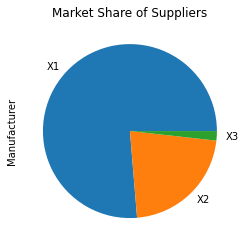

In [134]:
train_dataset['Manufacturer'].value_counts().plot.pie(title="Market Share of Suppliers")

From this we can understand that we are more than 75% dependent on Manufacturer X1. In case manufacturer X1, faces some issues, it will disrupt our supply chain. Hence, we should try to diversify and use more Manufacturers or source more products from other manufactures. This will reduce our reliablity on Manufacturer X1.

<AxesSubplot:title={'center':'Size and Product Sourcing Frequency'}>

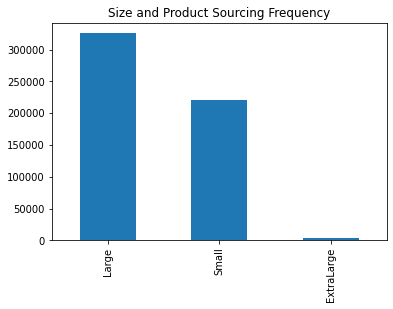

In [135]:
train_dataset['Product Size'].value_counts().plot.bar(title="Size and Product Sourcing Frequency")

In supply chain, it is important to manage inventory. Small products leads to more delivery charges and we can save more on larger orders. However, larger products are stored in inventory which costs us money. It might also become diffcult to get new products with old products in inventory.

Nothing can be said here without additional data. Inventory management is a completely different problem.

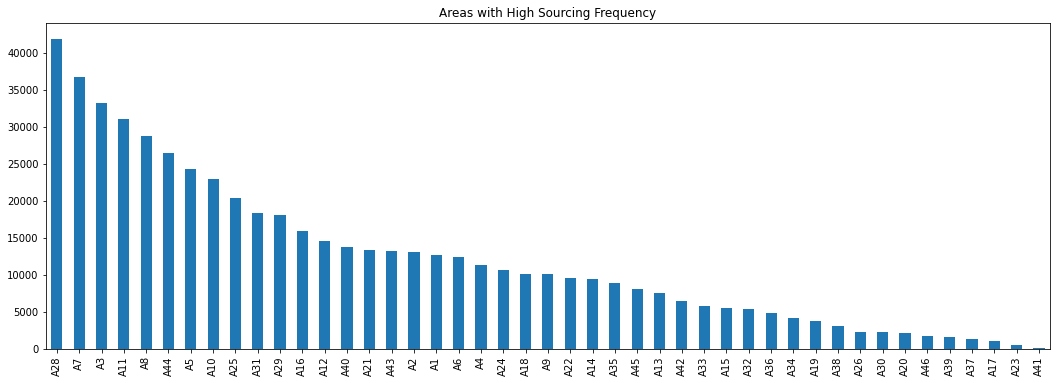

In [136]:
train_dataset['Area Code'].value_counts().plot.bar(title="Areas with High Sourcing Frequency",figsize=(18,6));

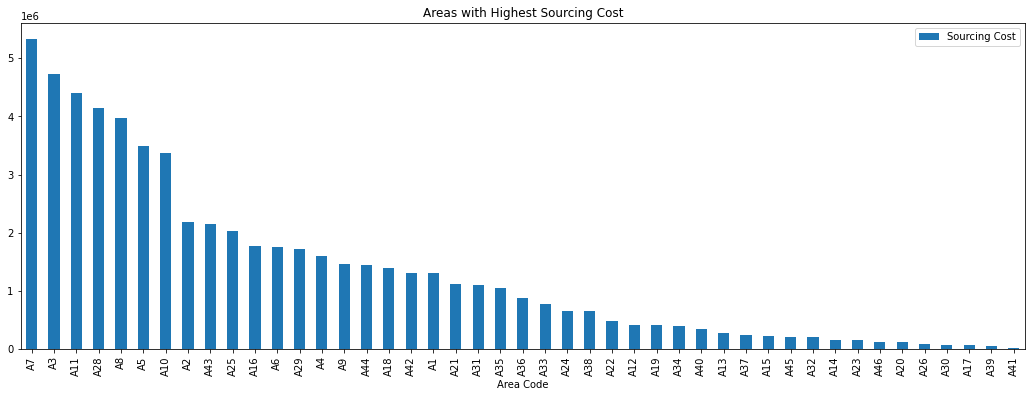

In [137]:
areas_by_sourcing_cost = train_dataset.groupby(['Area Code']).sum()
areas_by_sourcing_cost.sort_values('Sourcing Cost', ascending=False).plot.bar(title="Areas with Highest Sourcing Cost", figsize=(18,6));

##### Creating Individual Product levels

In [138]:
# Renaming columns
train_dataset.rename(columns={'ProductType':'ProductName'}, inplace=True)
train_dataset.columns = [column_name.replace(' ','') for column_name in train_dataset.columns]


train_dataset['ProductID'] = train_dataset['ProductName'].map(str) + train_dataset['Manufacturer'] + \
                             train_dataset['AreaCode'] + train_dataset['SourcingChannel'] + \
                             train_dataset['ProductSize'] + train_dataset['ProductType']

In [139]:
gb = train_dataset.groupby(['ProductID'])
groups = [gb.get_group(group_name) for group_name in gb.groups]

## Outliers

### Top Level - Product Level (Before & After Outlier Removal)

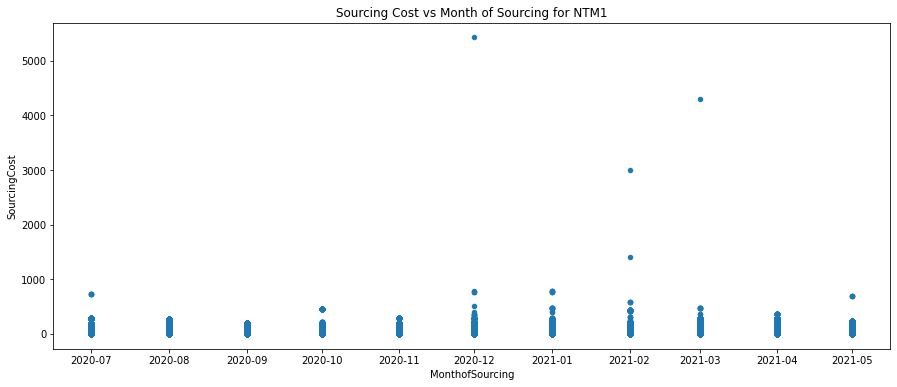

In [140]:
train_dataset[train_dataset.ProductName=='NTM1'].plot.scatter(x='MonthofSourcing',y='SourcingCost', figsize=(15,6), \
                                                             title="Sourcing Cost vs Month of Sourcing for NTM1");

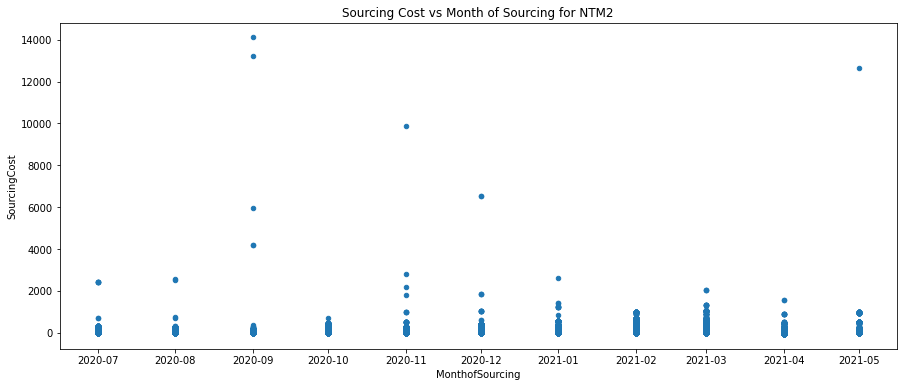

In [141]:
train_dataset[train_dataset.ProductName=='NTM2'].plot.scatter(x='MonthofSourcing',y='SourcingCost', figsize=(15,6), \
                                                             title="Sourcing Cost vs Month of Sourcing for NTM2");

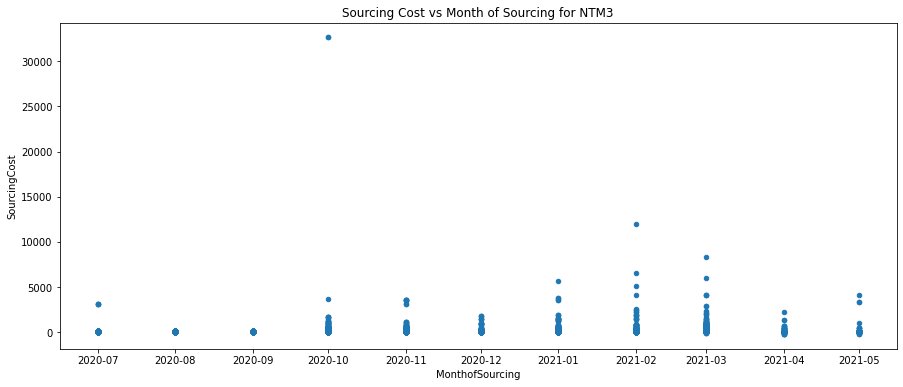

In [142]:
train_dataset[train_dataset.ProductName=='NTM3'].plot.scatter(x='MonthofSourcing',y='SourcingCost', figsize=(15,6), \
                                                             title="Sourcing Cost vs Month of Sourcing for NTM3");

### Bottom Level - Individual Product Unit Level (Before & After Outlier Removal)

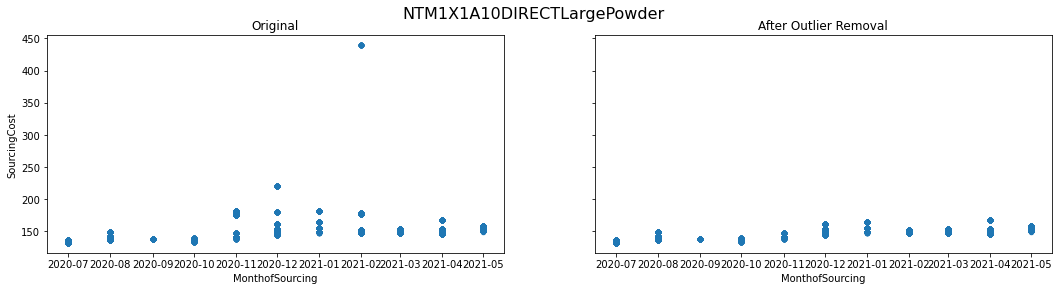

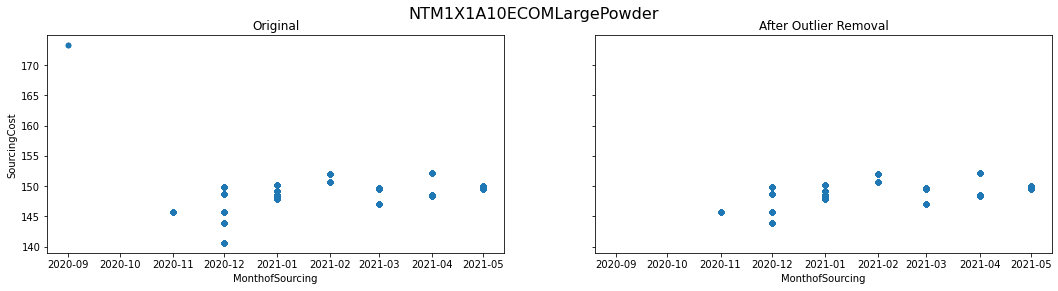

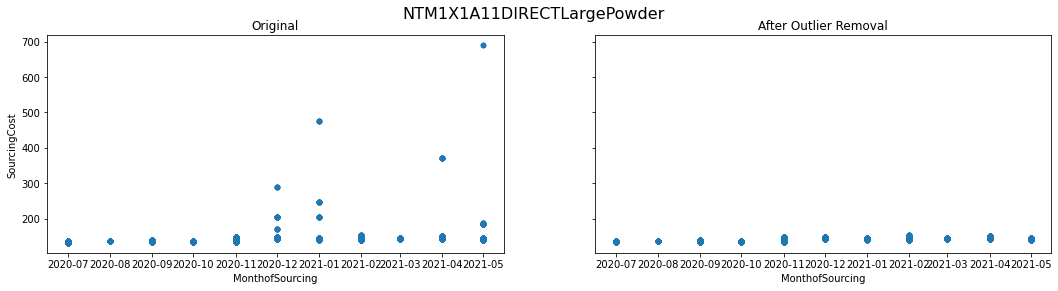

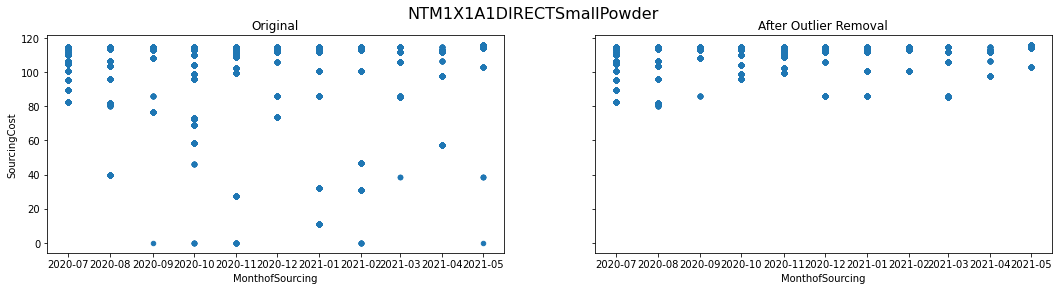

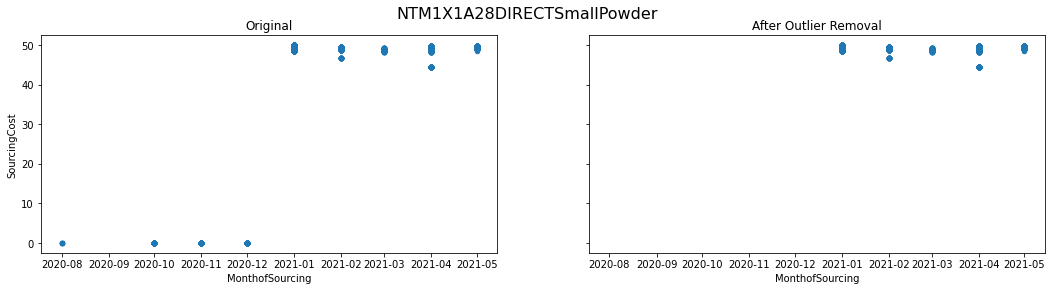

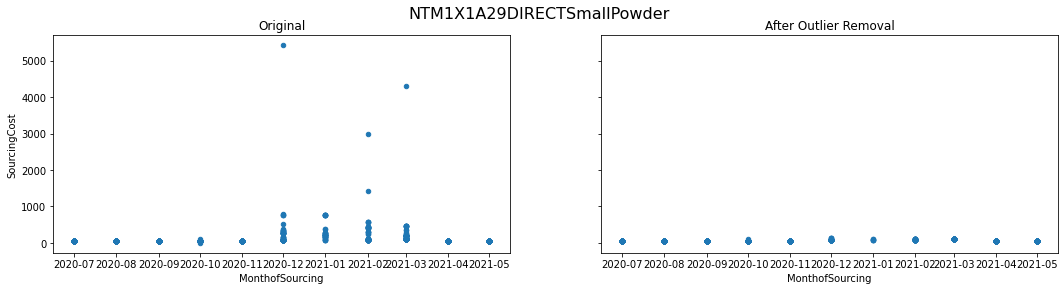

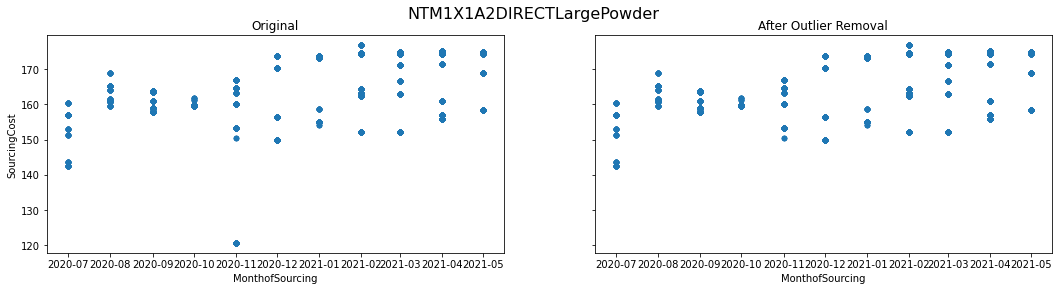

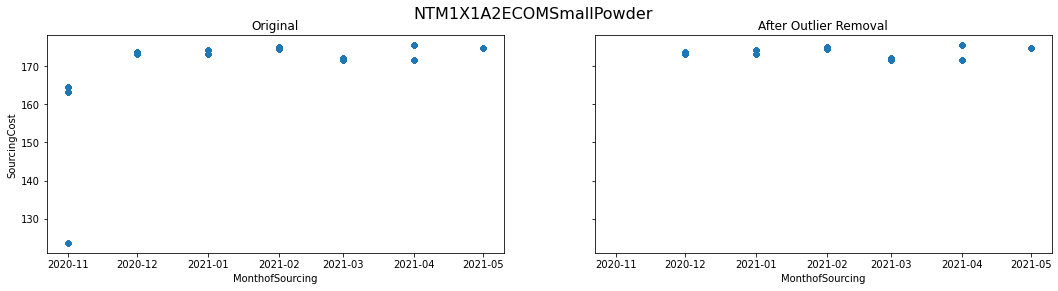

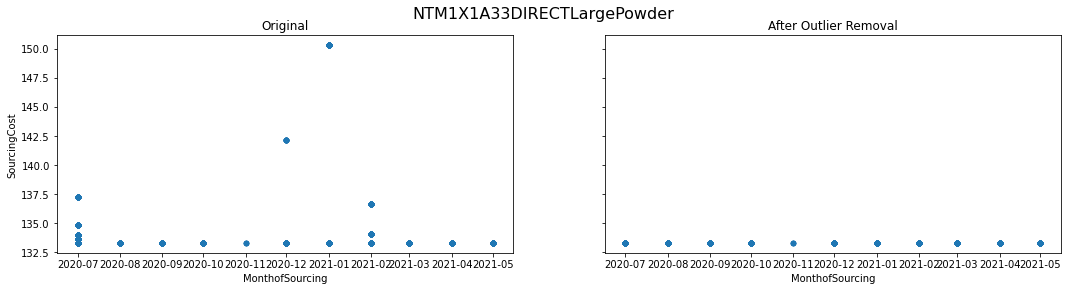

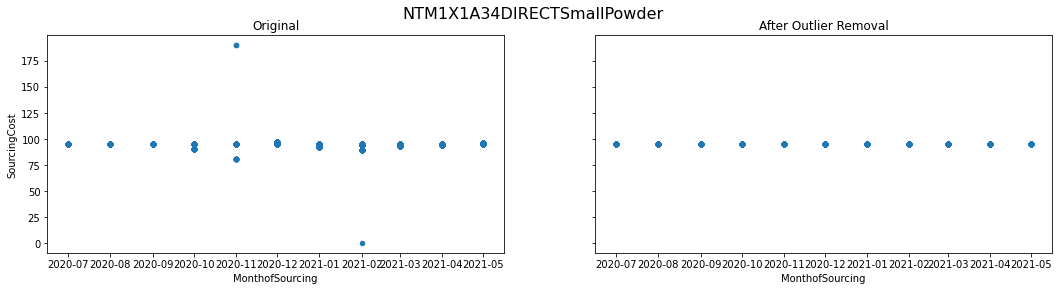

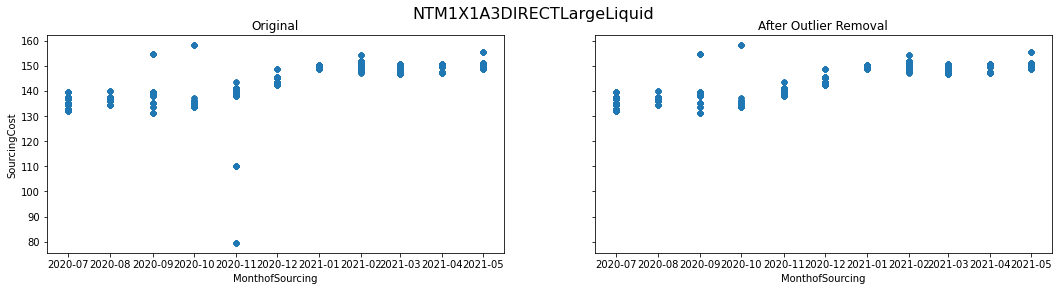

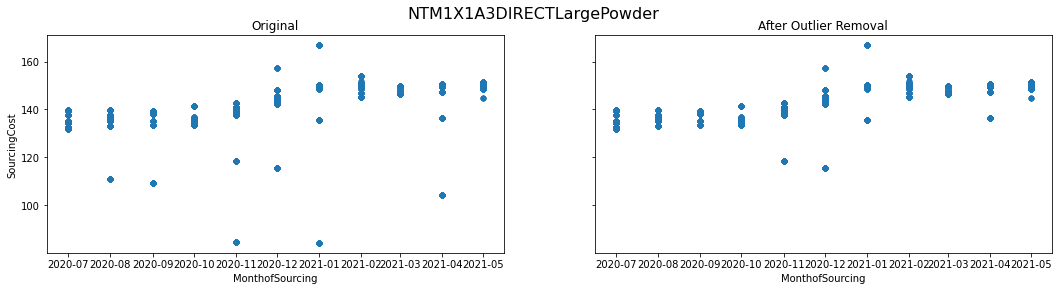

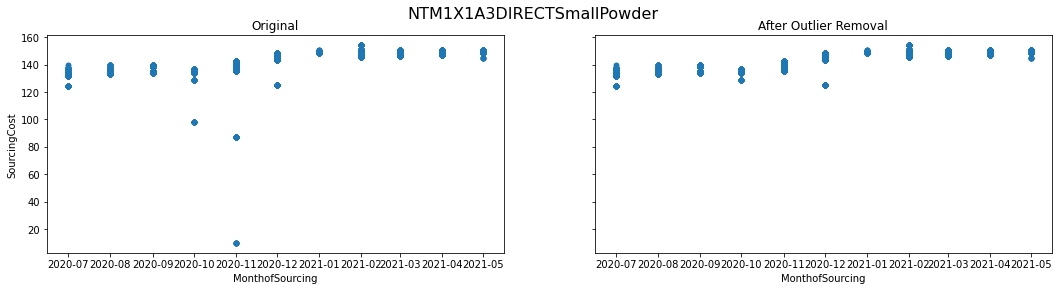

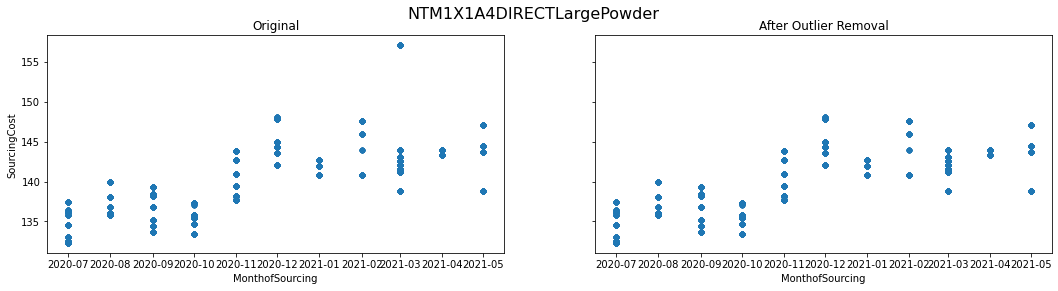

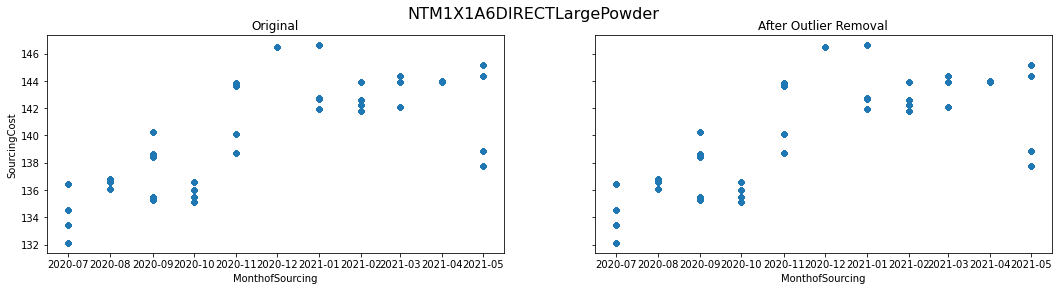

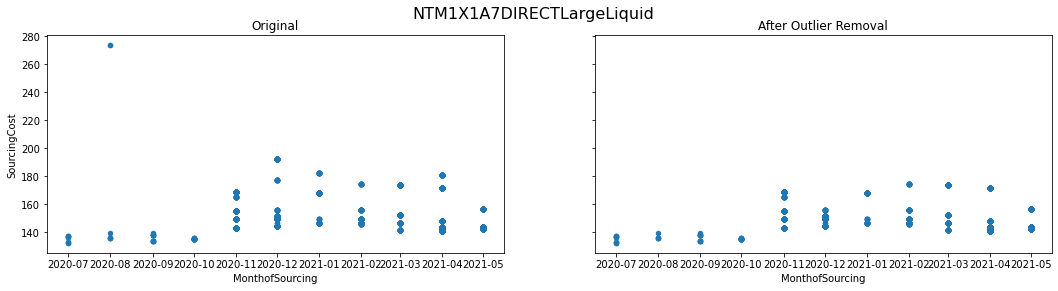

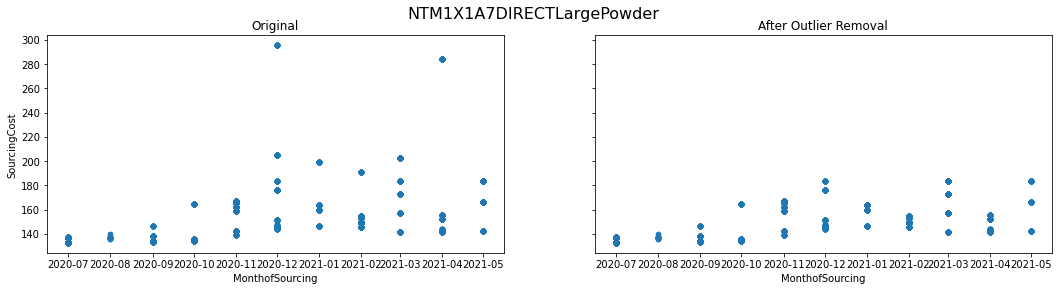

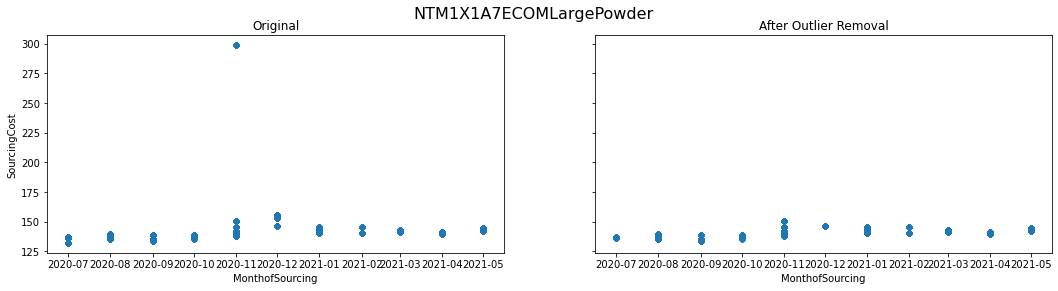

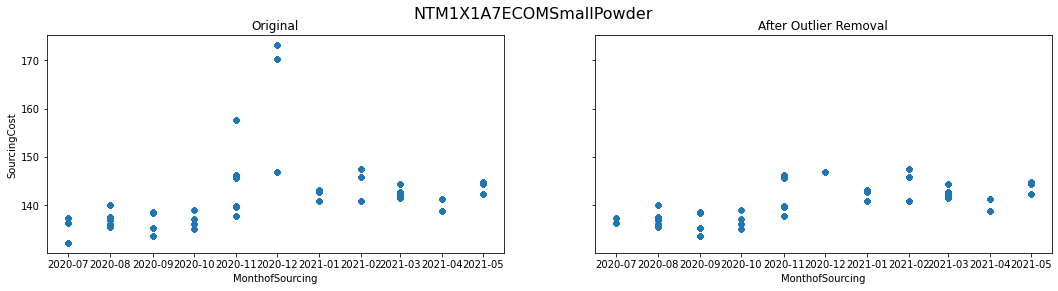

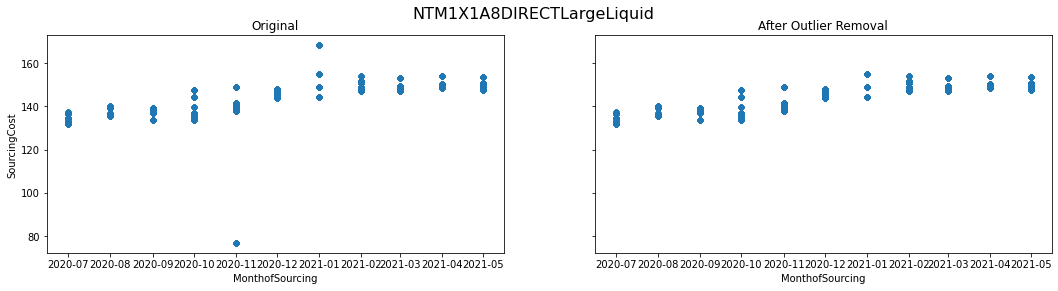

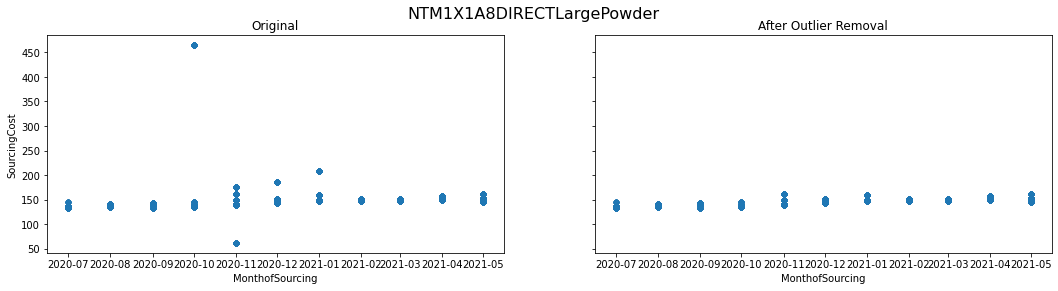

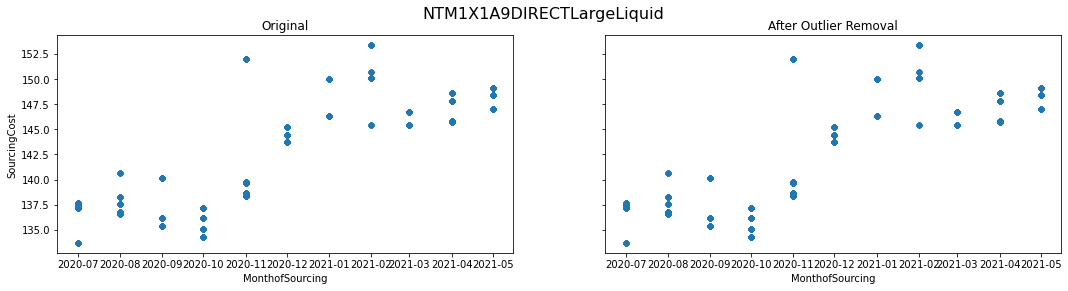

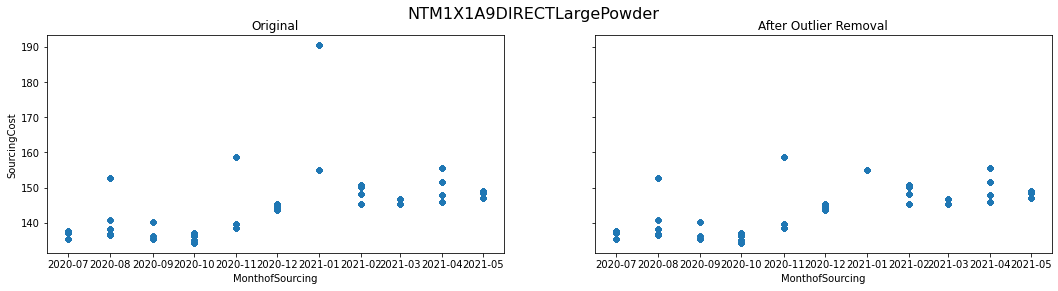

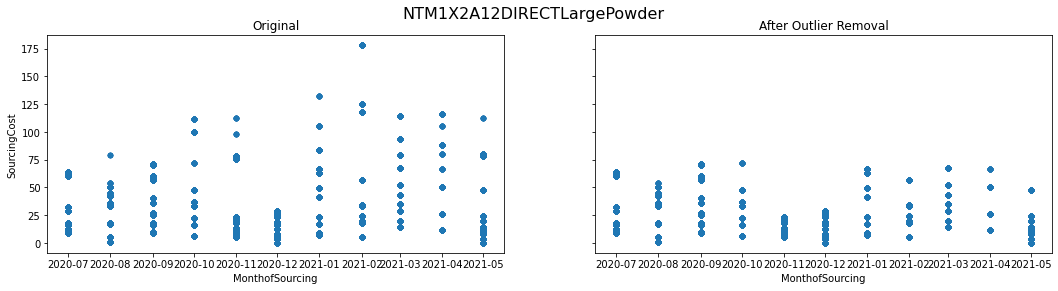

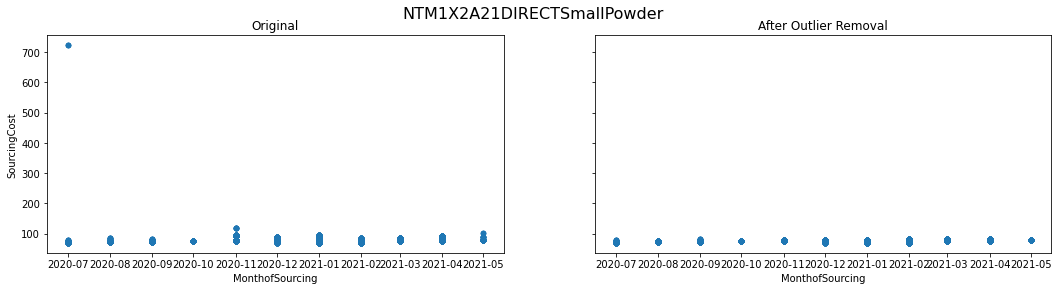

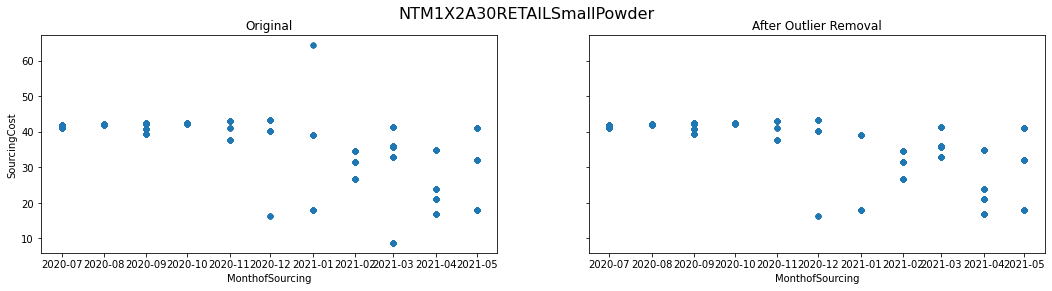

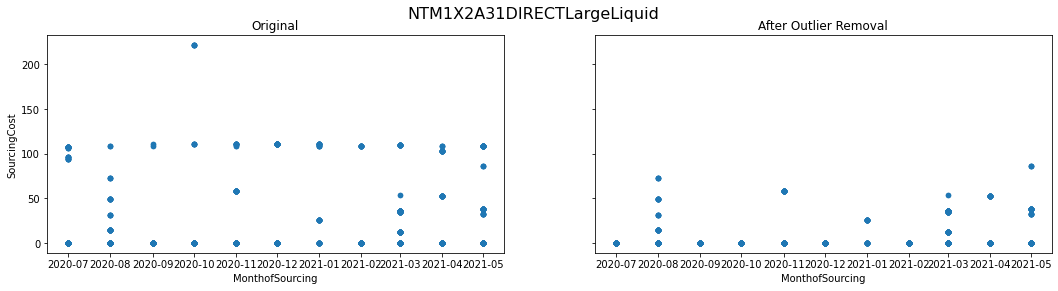

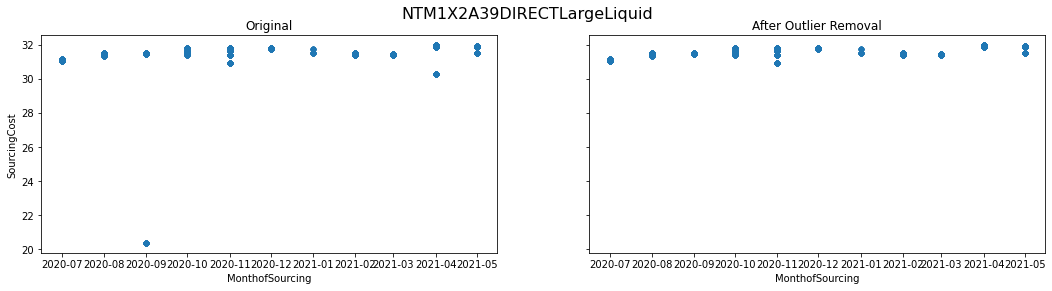

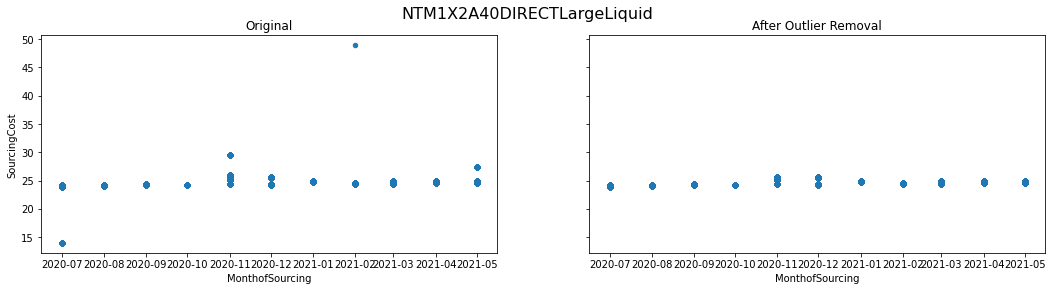

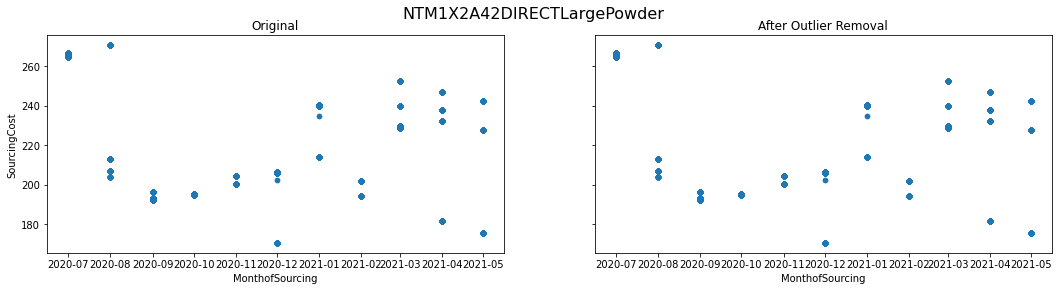

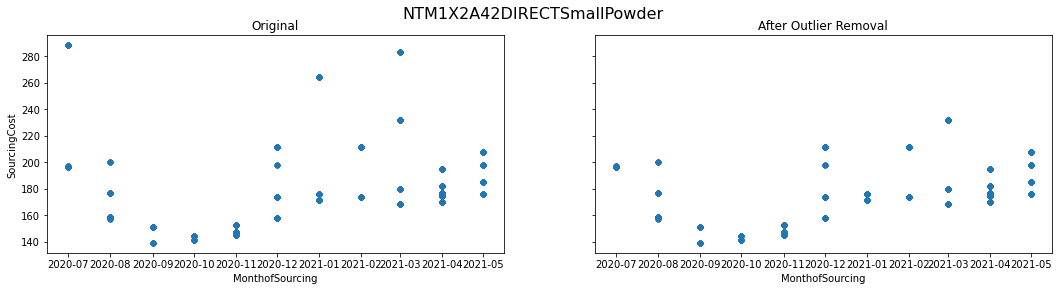

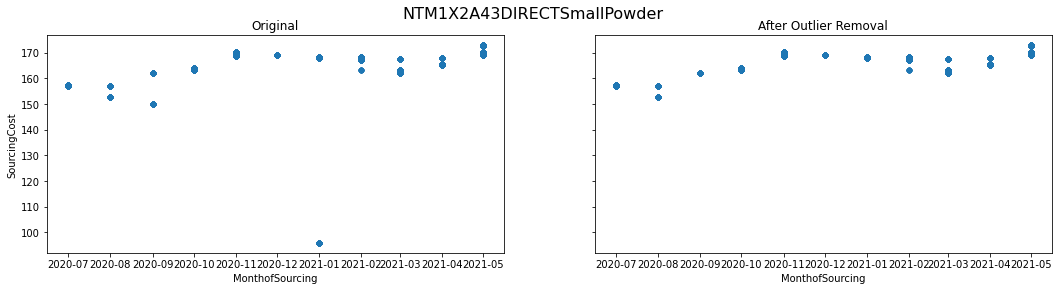

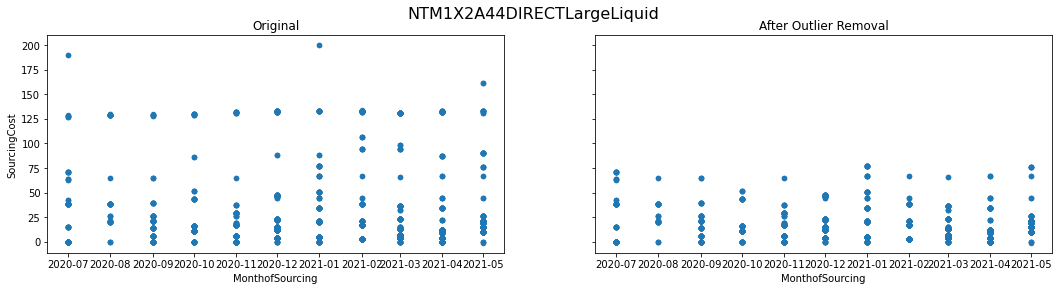

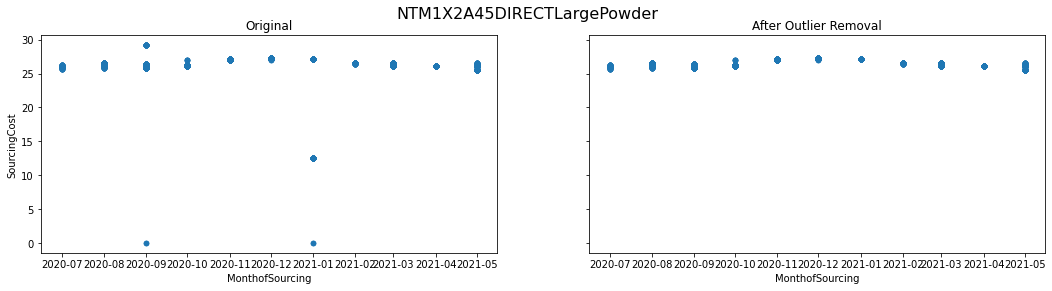

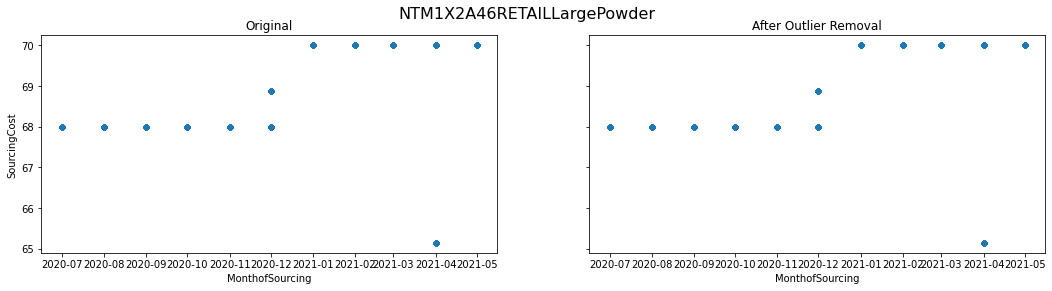

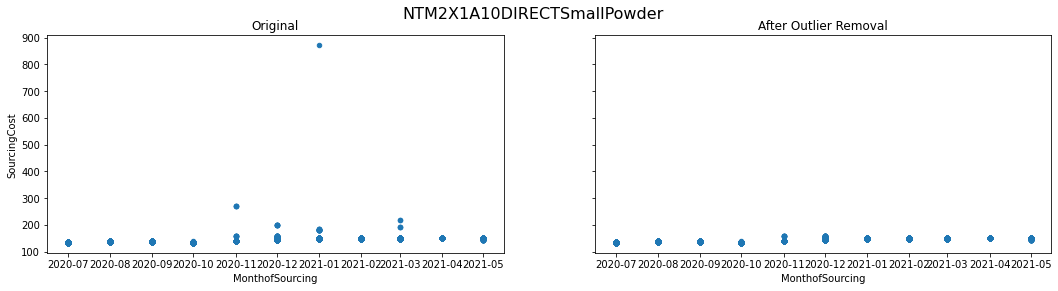

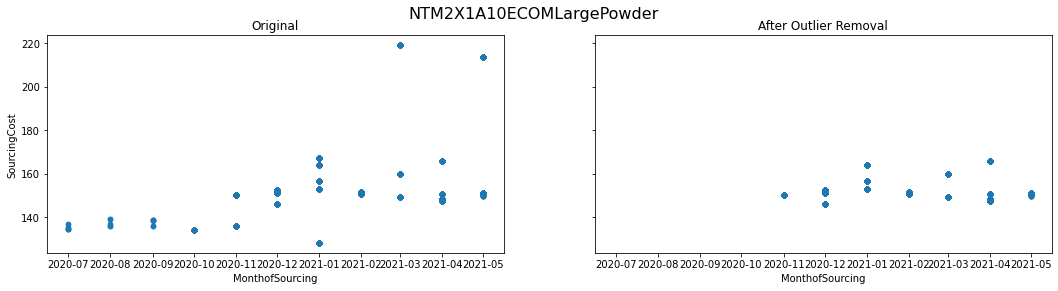

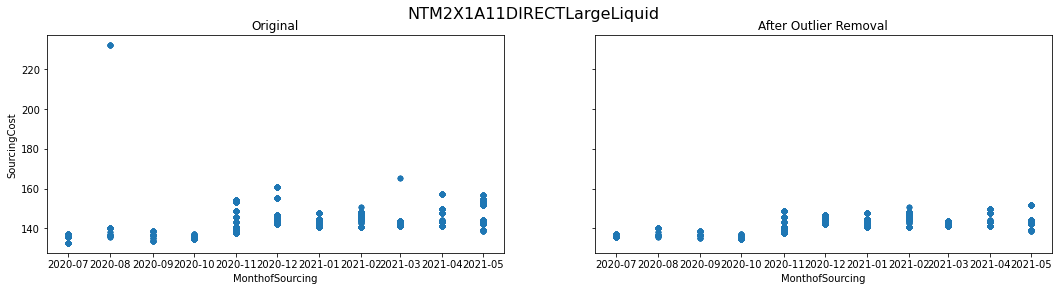

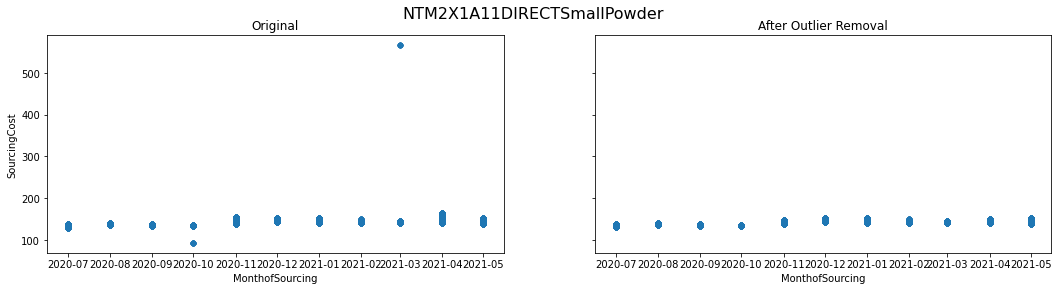

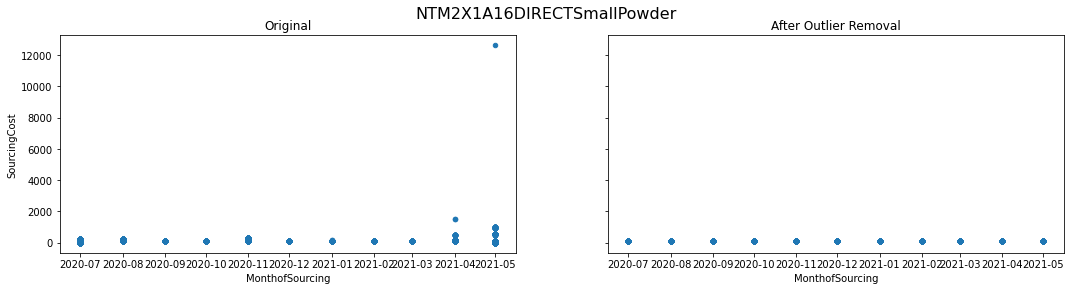

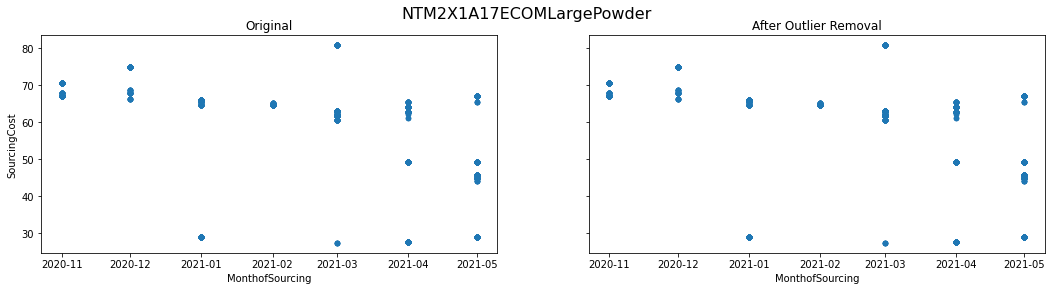

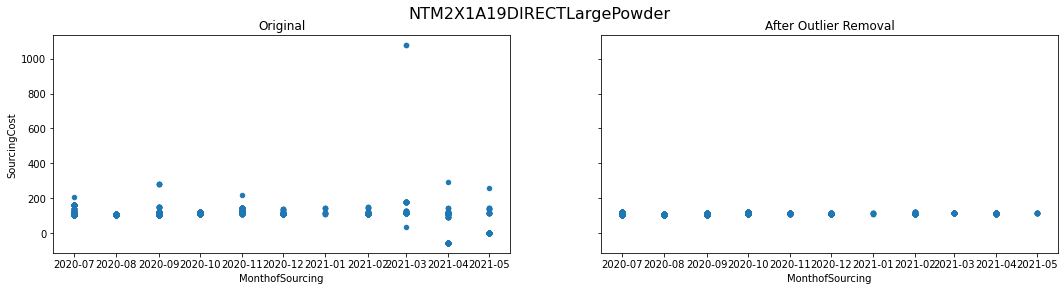

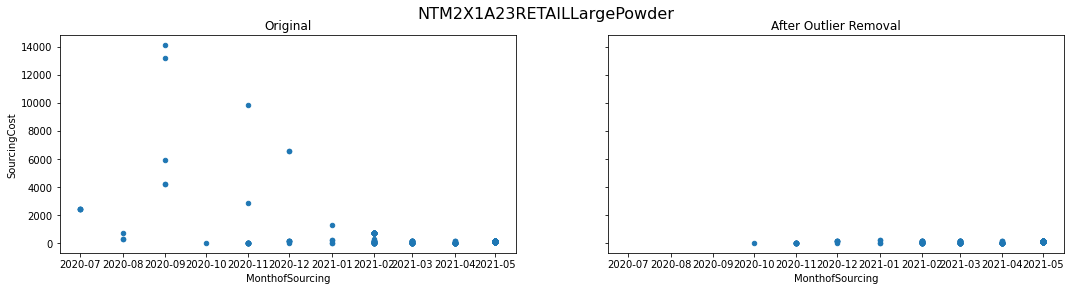

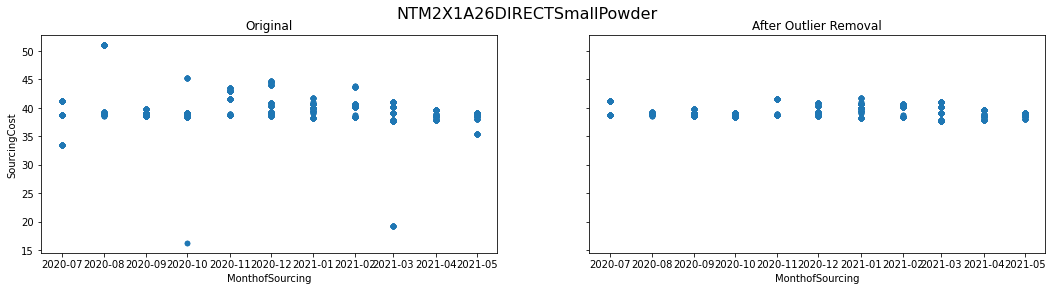

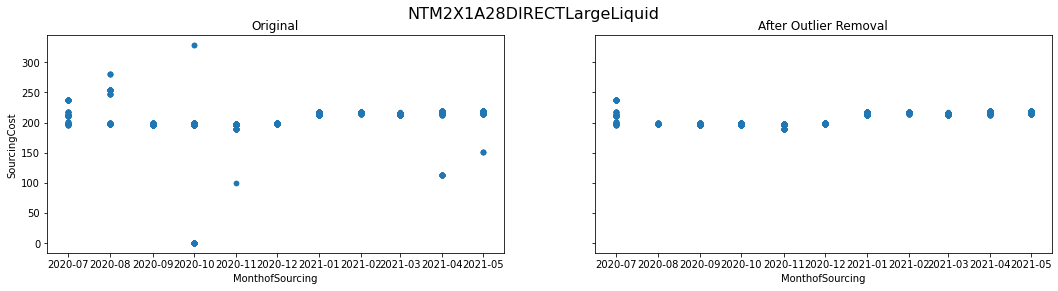

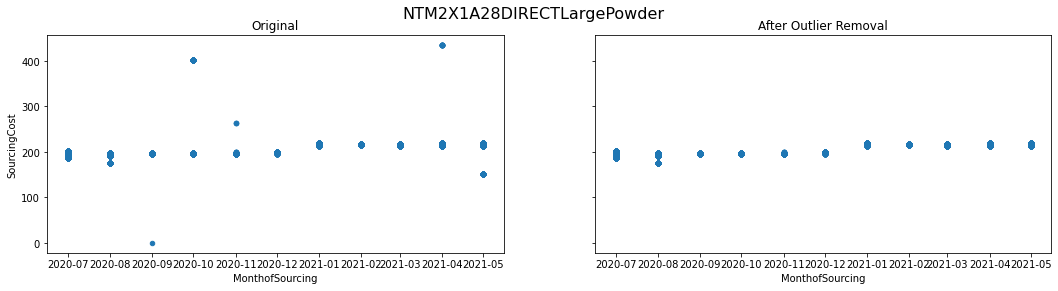

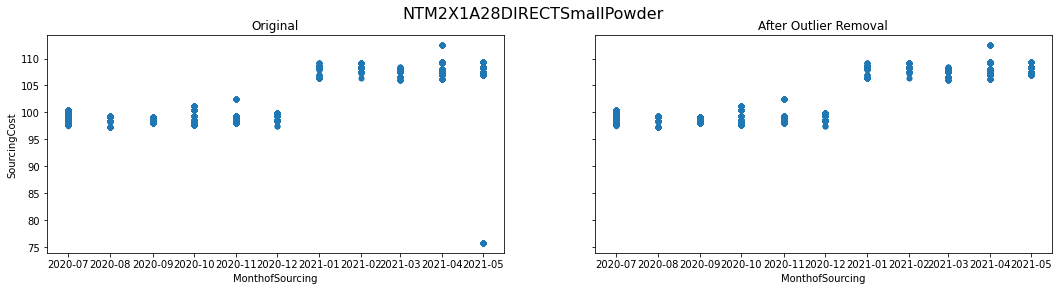

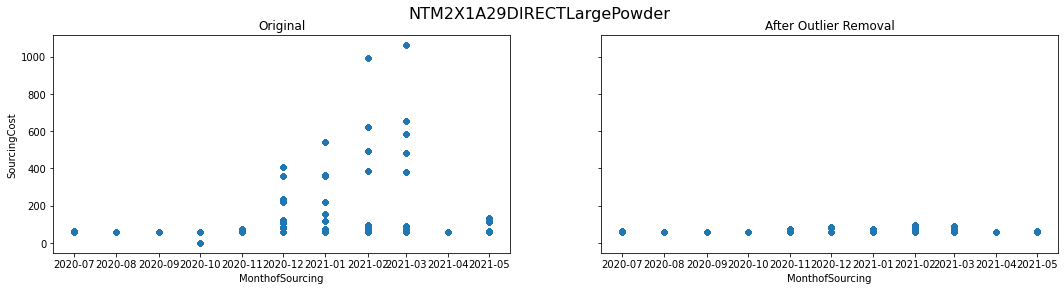

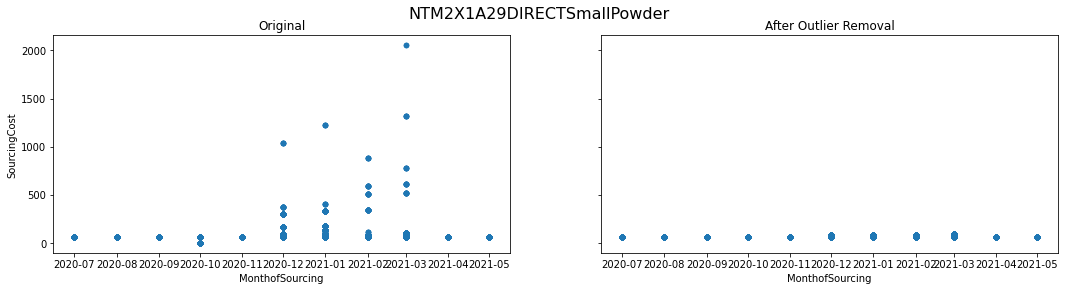

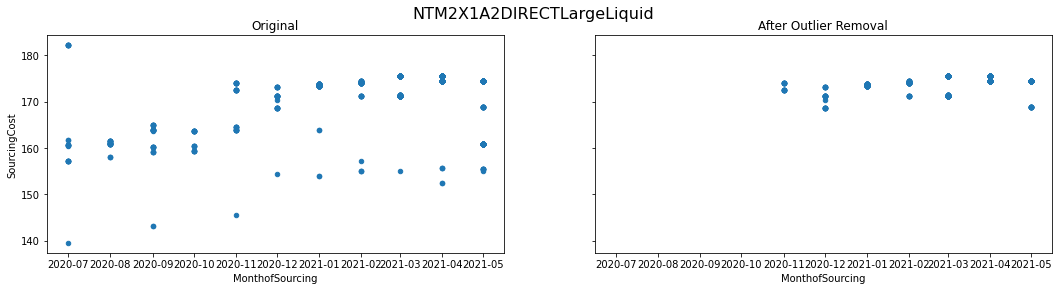

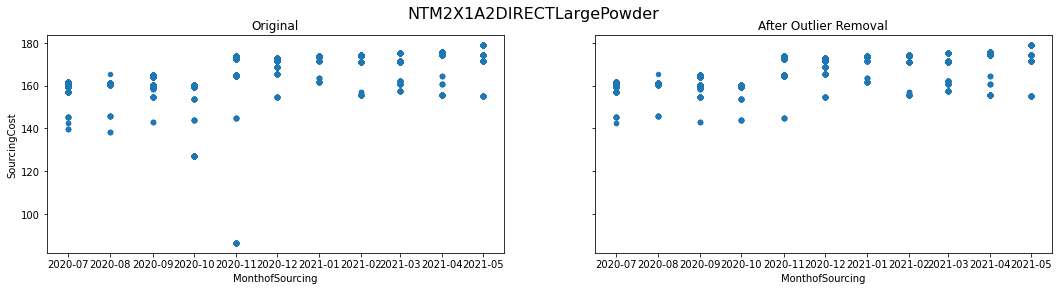

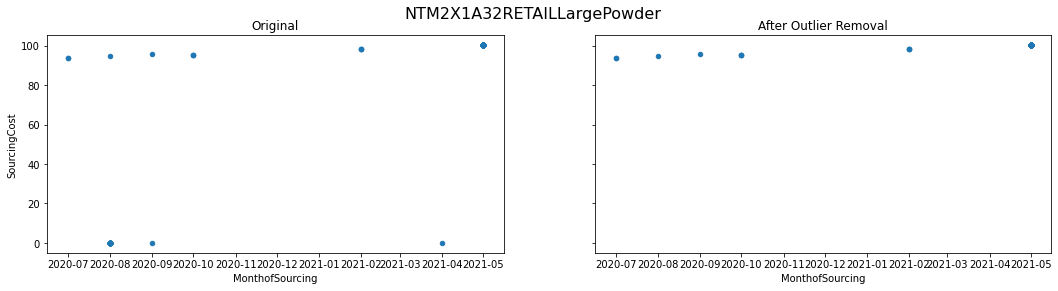

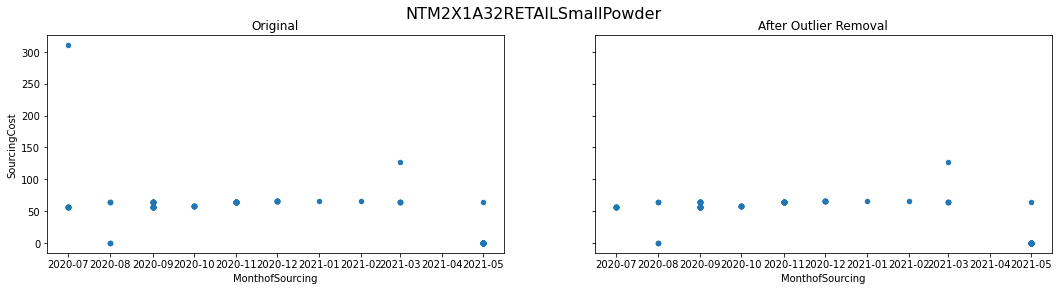

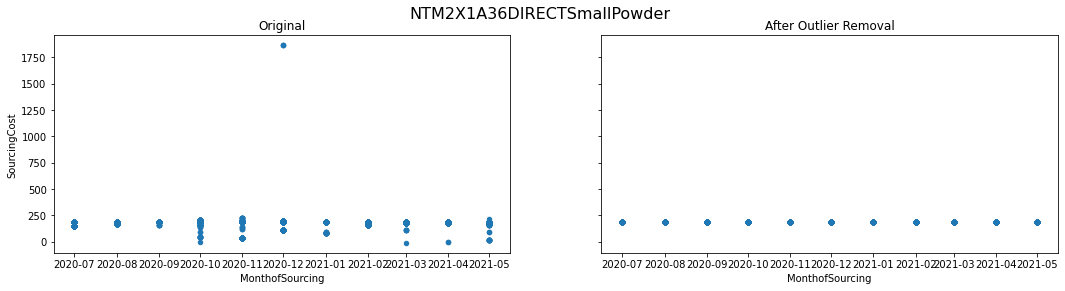

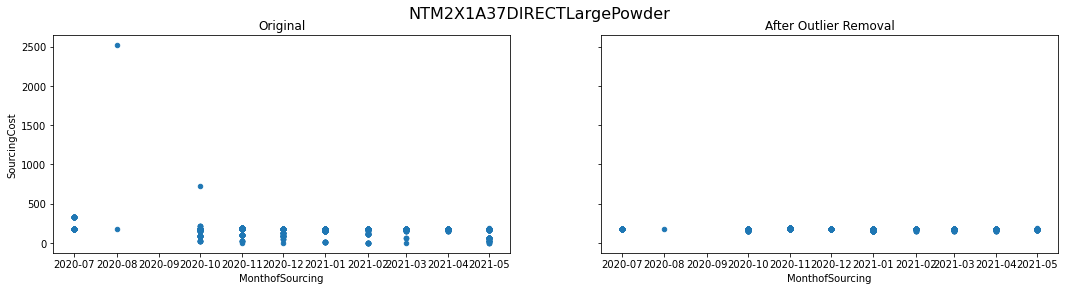

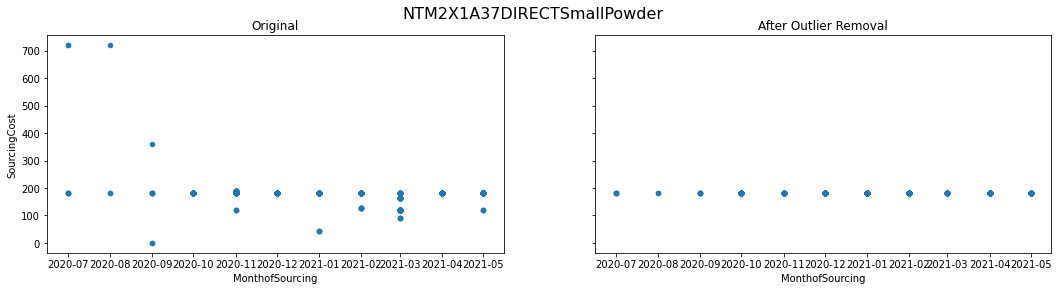

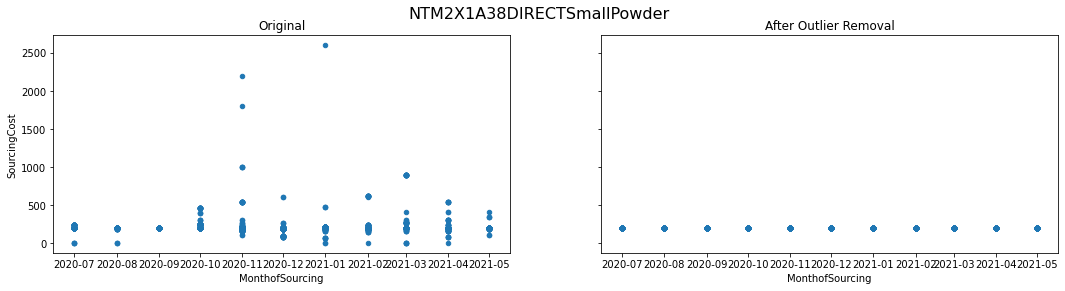

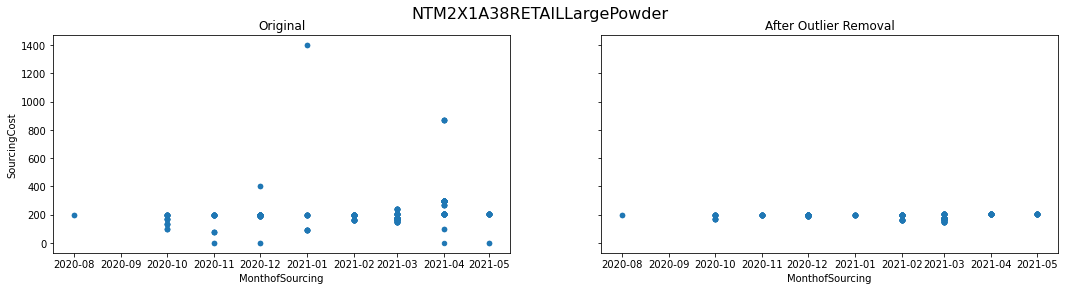

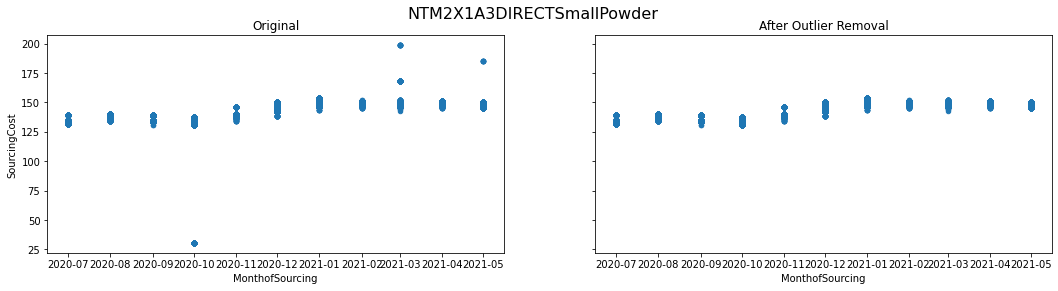

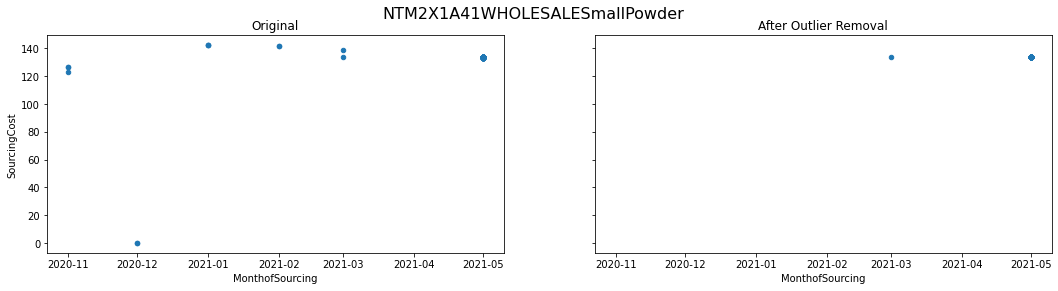

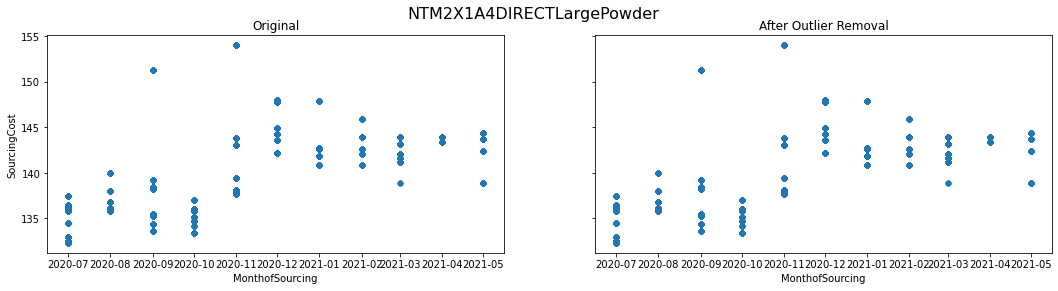

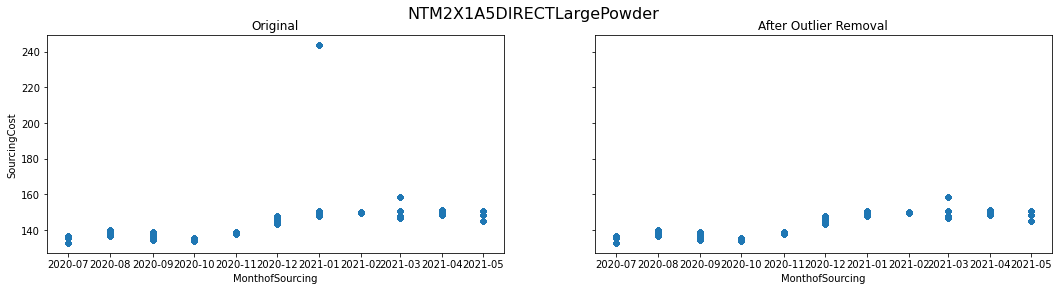

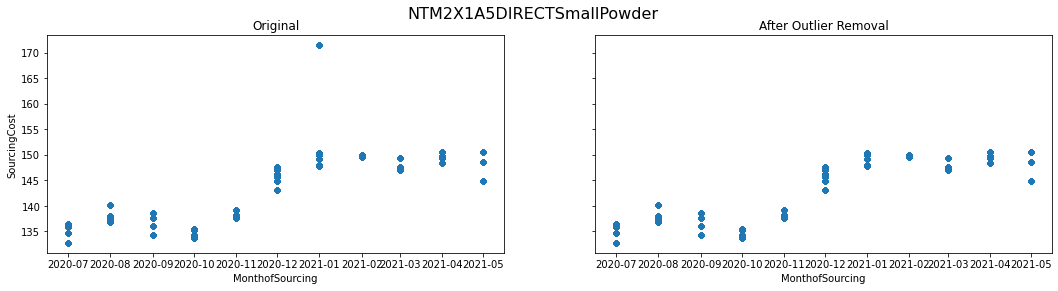

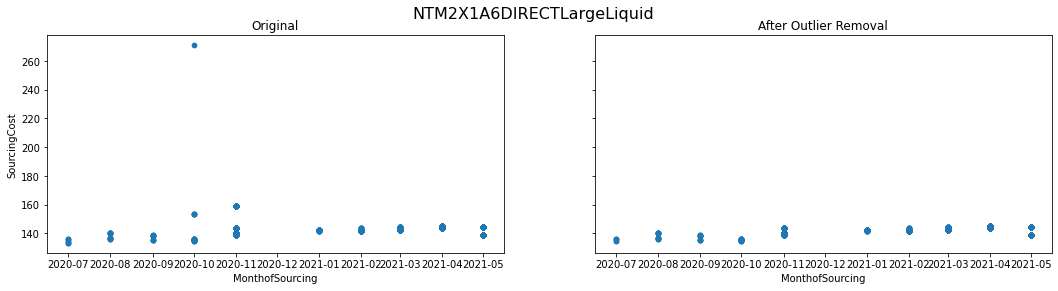

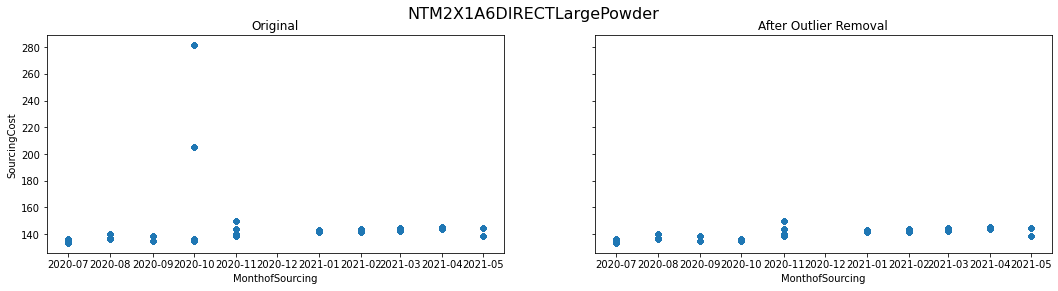

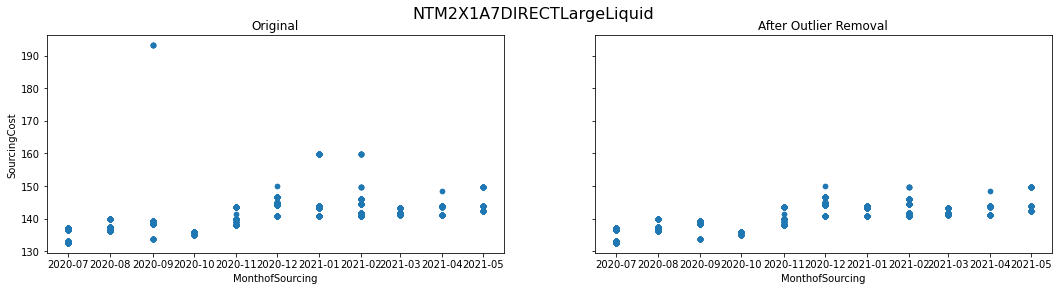

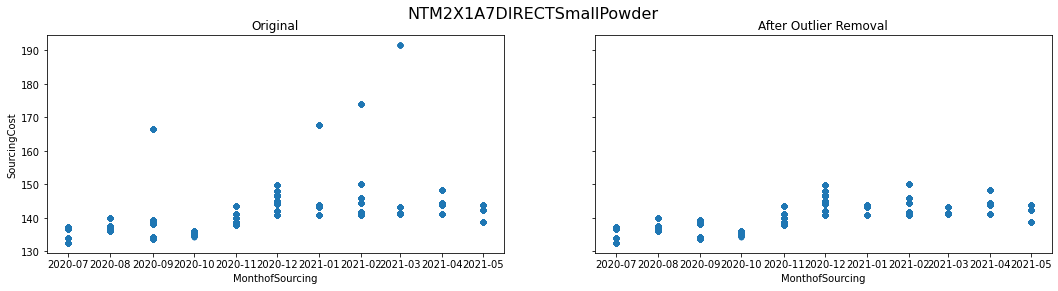

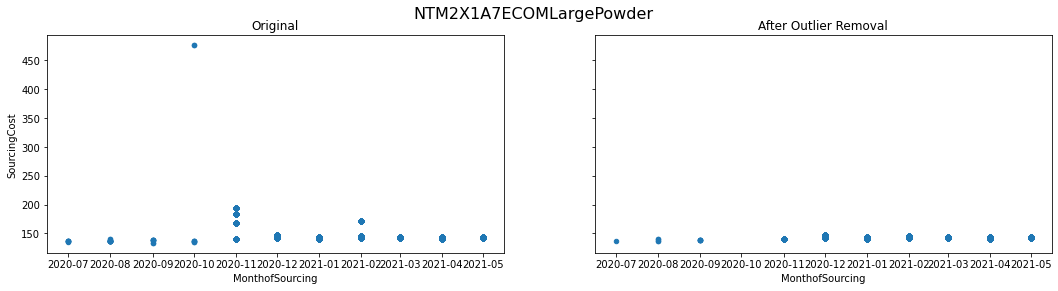

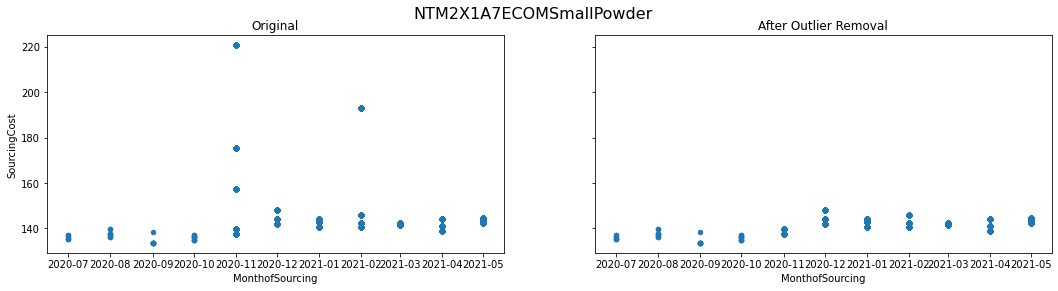

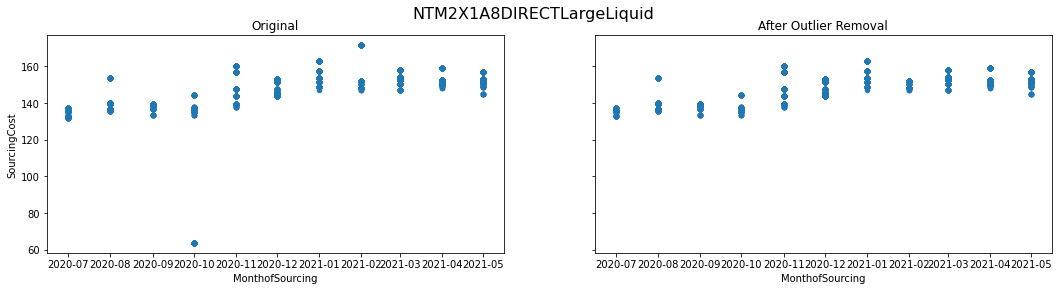

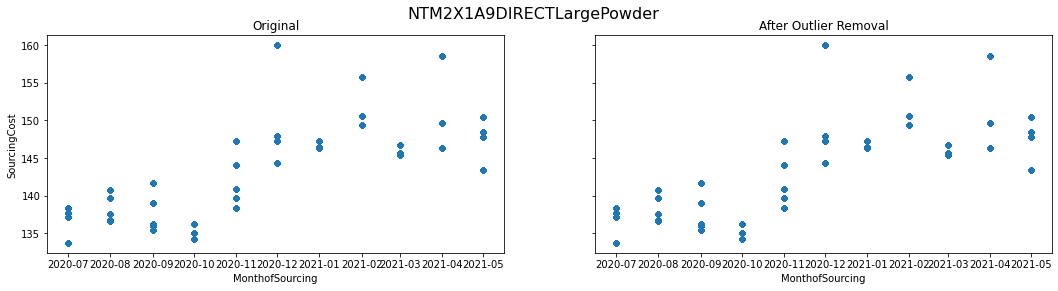

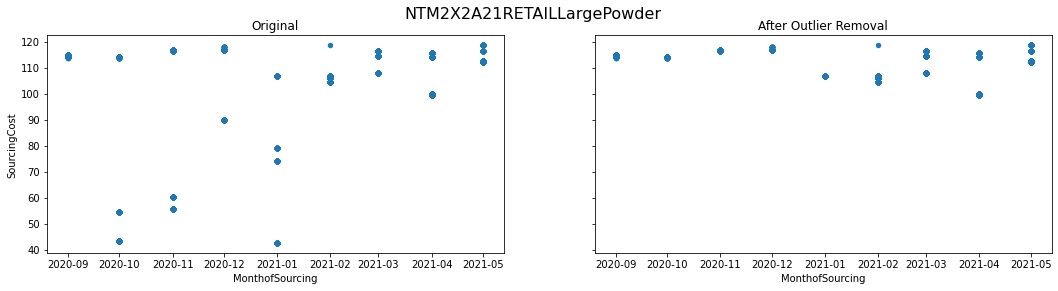

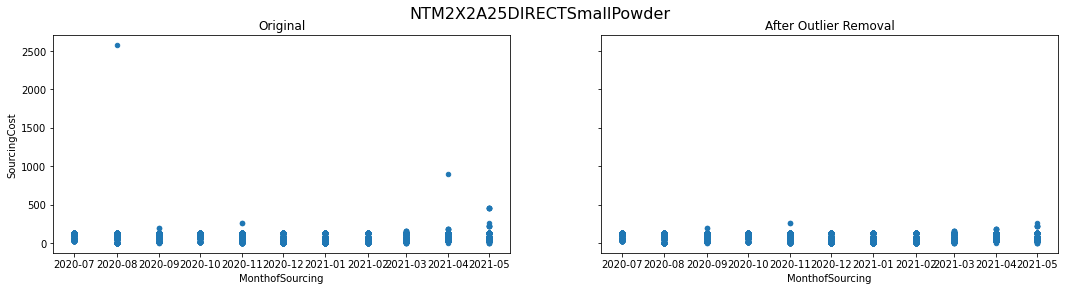

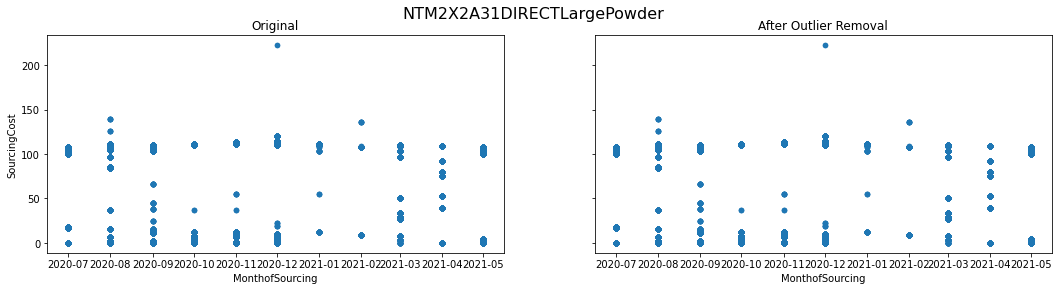

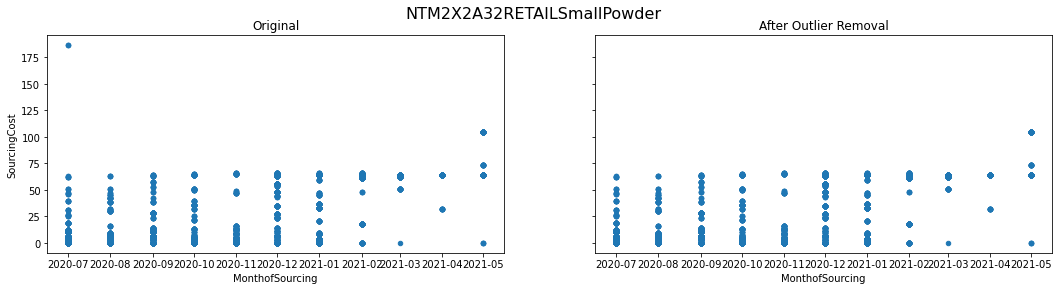

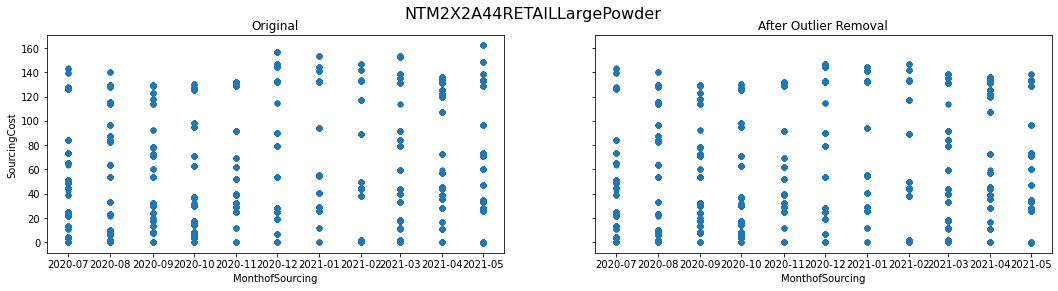

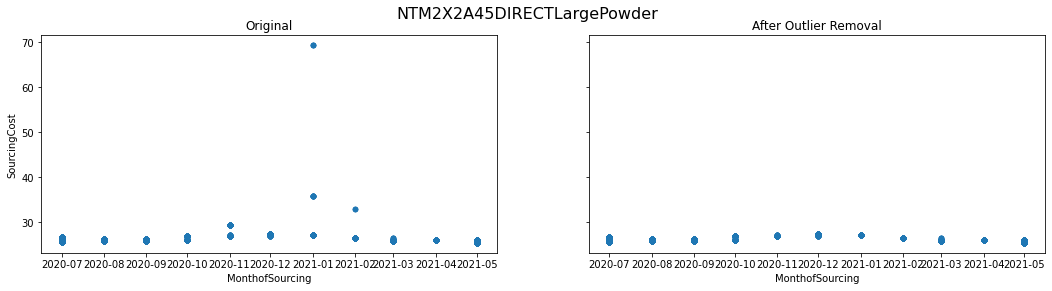

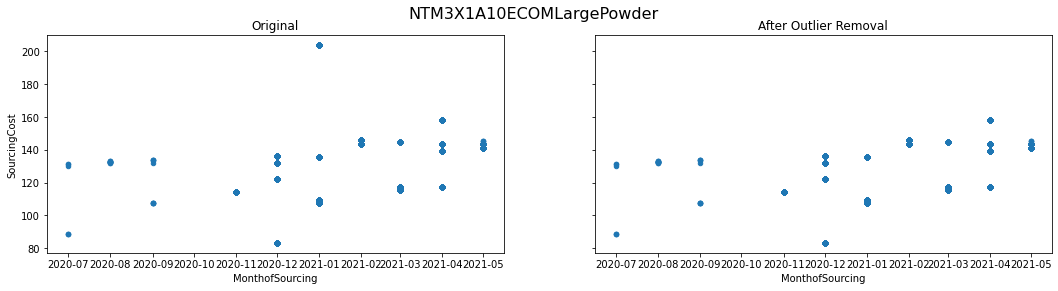

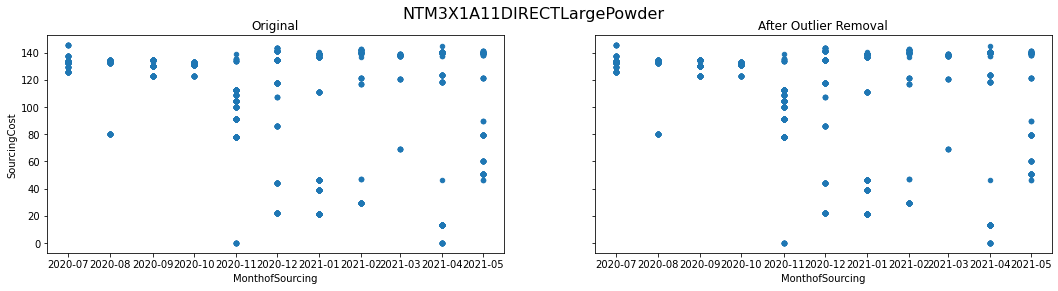

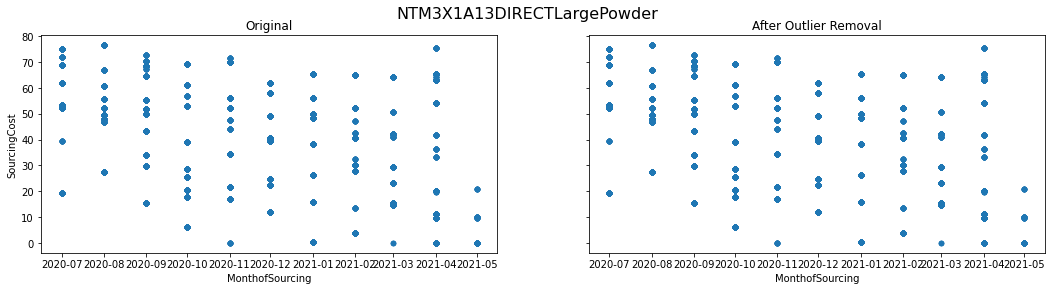

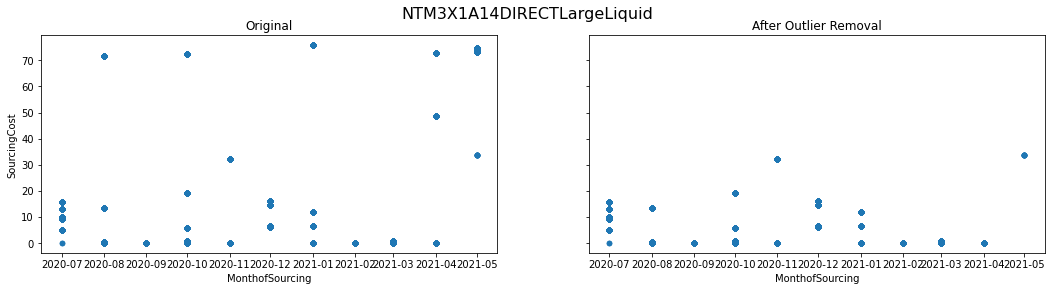

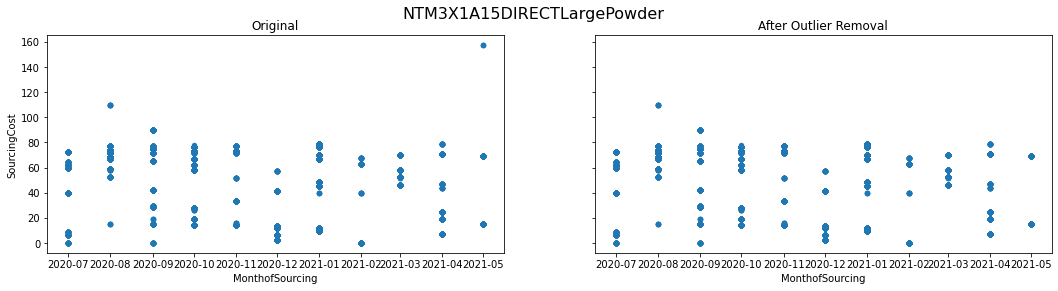

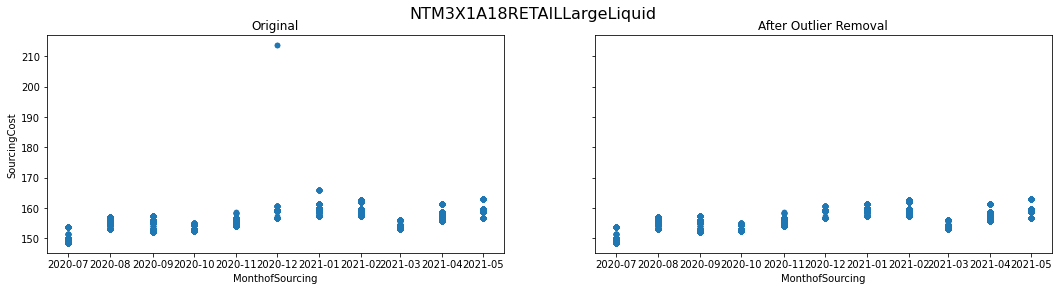

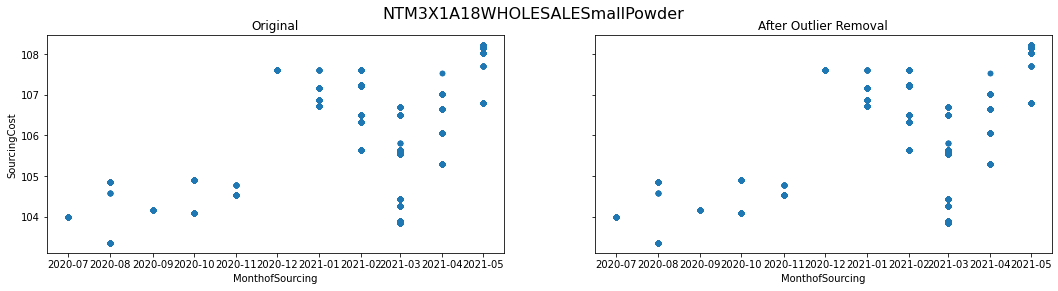

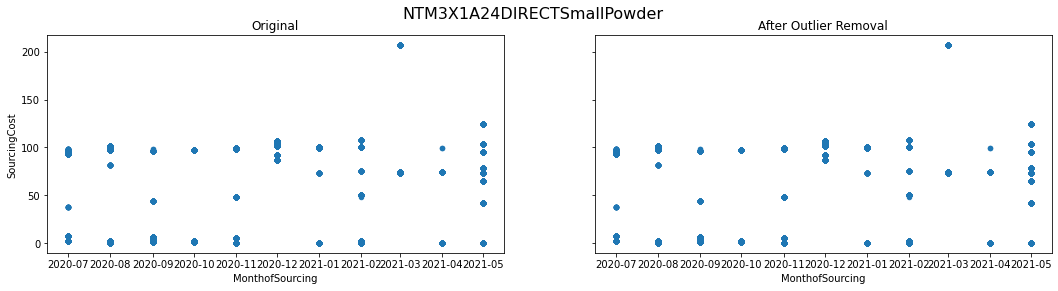

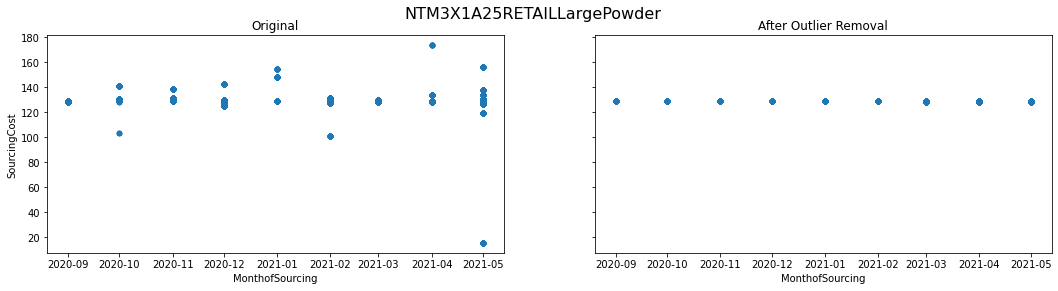

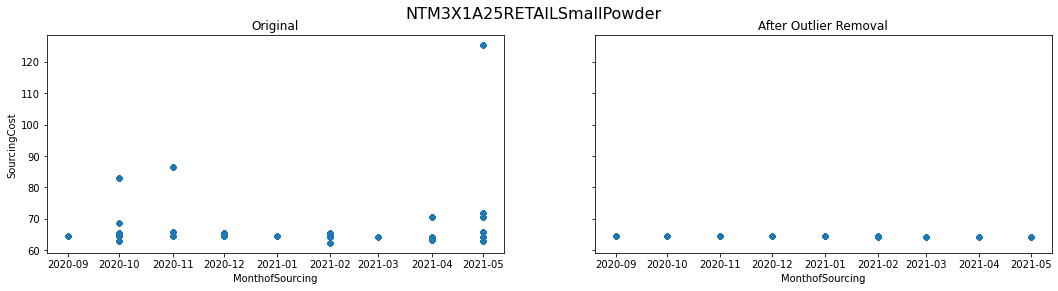

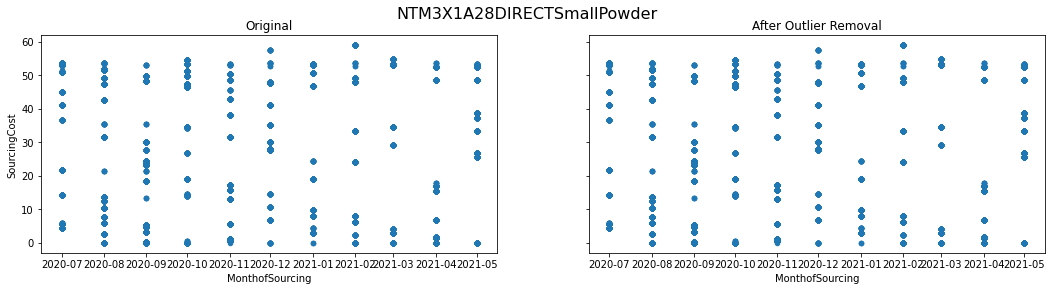

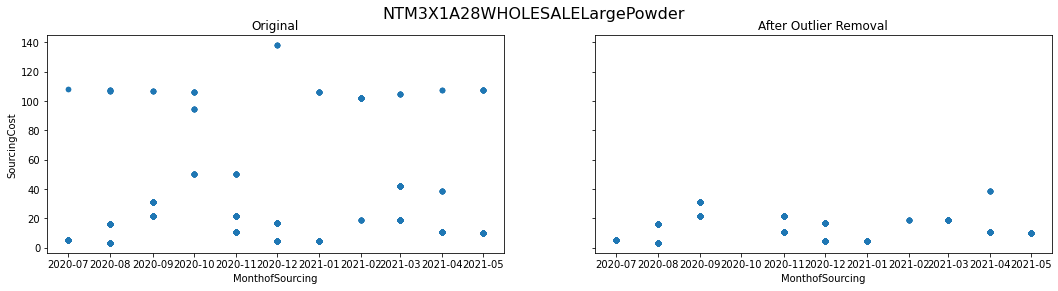

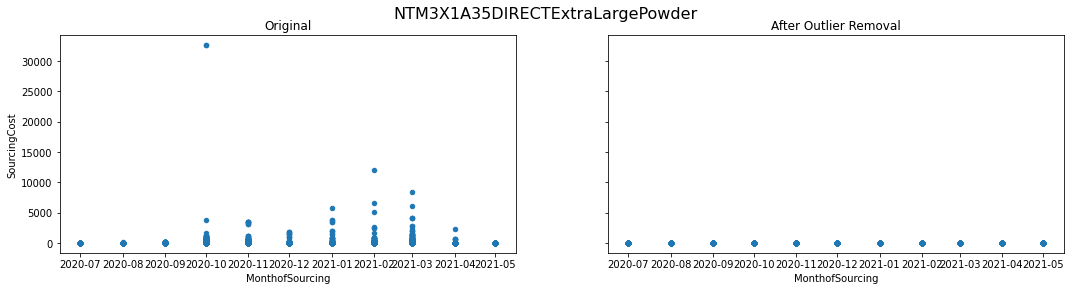

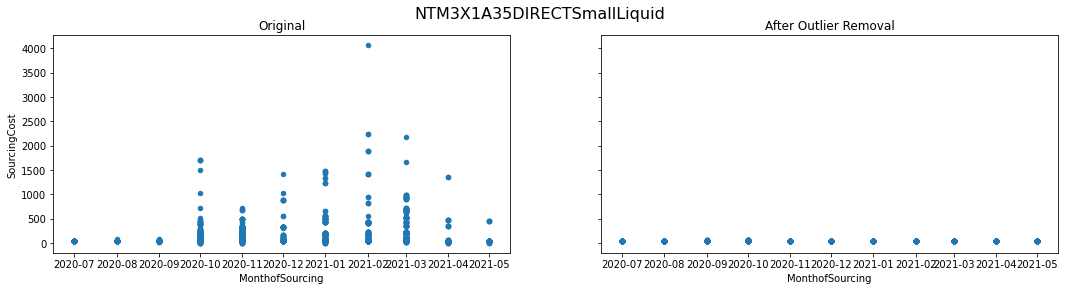

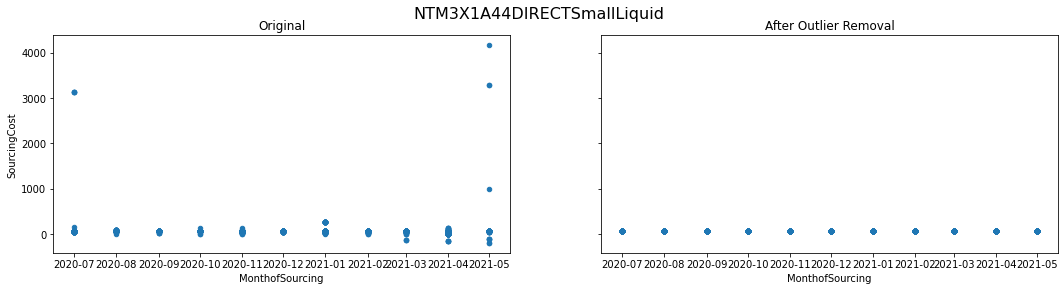

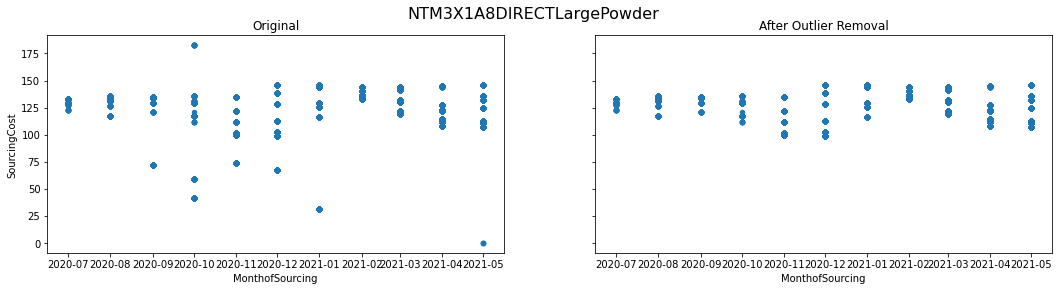

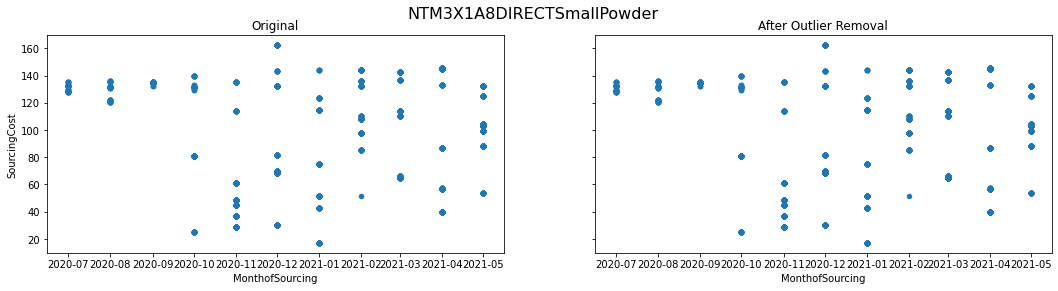

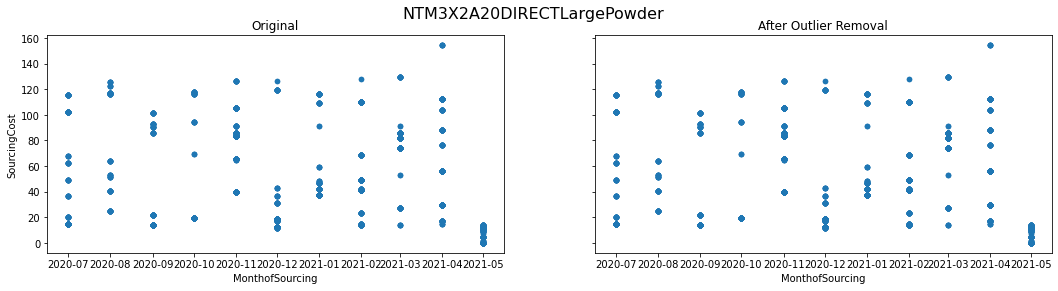

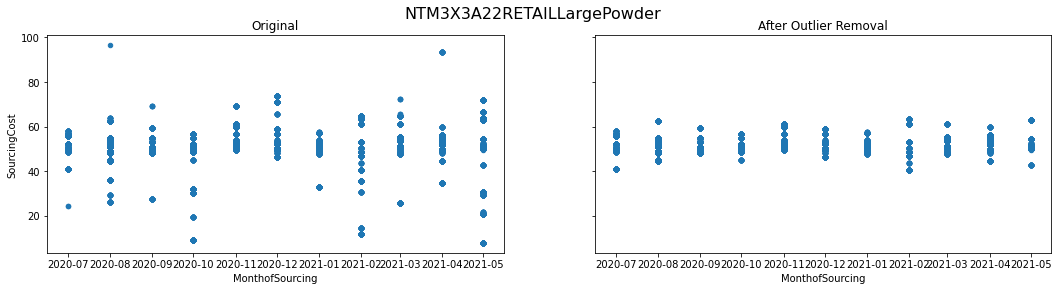

In [143]:
for group in groups:
    df = group[['SourcingCost','MonthofSourcing']].reset_index(drop=True)  
    PID = group.ProductID.unique()[0]

    # Creating subplots
    figure, axes = plt.subplots(1, 2, figsize=(18,4), sharex=True, sharey=True)
    figure.suptitle(PID, fontsize=16)

    # Scatterplot with outliers
    df.plot.scatter(x='MonthofSourcing', y='SourcingCost', ax=axes[0], title='Original')

    # Removing Outliers using Inter Quartile Range
    Q1 = np.percentile(df['SourcingCost'], 25, interpolation = 'midpoint') 
    Q3 = np.percentile(df['SourcingCost'], 75, interpolation = 'midpoint') 
    IQR = Q3 - Q1 
    old_shape = df.shape
    upper = np.where(df['SourcingCost'] > (Q3+1.5*IQR))
    lower = np.where(df['SourcingCost'] < (Q1-1.5*IQR))
    df.drop(upper[0], axis=0, inplace = True)
    df.drop(lower[0], axis=0, inplace = True)

    # Scatterplot without outliers
    df.plot.scatter(x='MonthofSourcing', y='SourcingCost',ax=axes[1], title='After Outlier Removal');

## Time Series

### Top Level - Product Level - (Total Sourcing Cost )

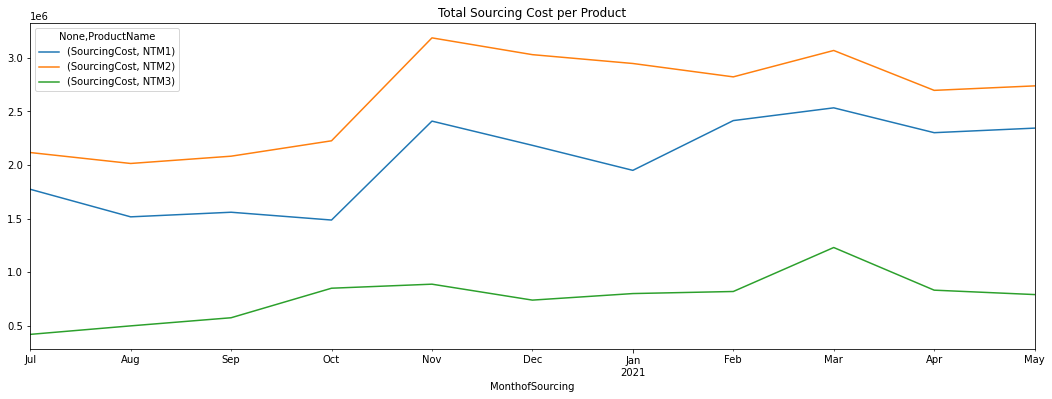

In [144]:
train_dataset.groupby(['ProductName','MonthofSourcing']).sum().unstack(0).plot(title="Total Sourcing Cost per Product", \
                                                                                 figsize=(18,6));

### Bottom Level - Individual Product Level (Average Sourcing Cost)

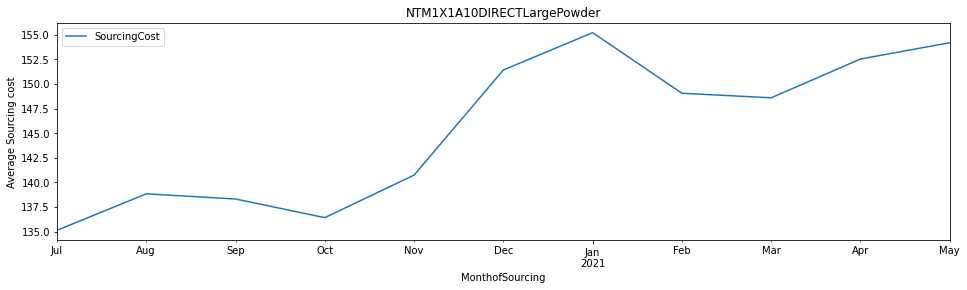

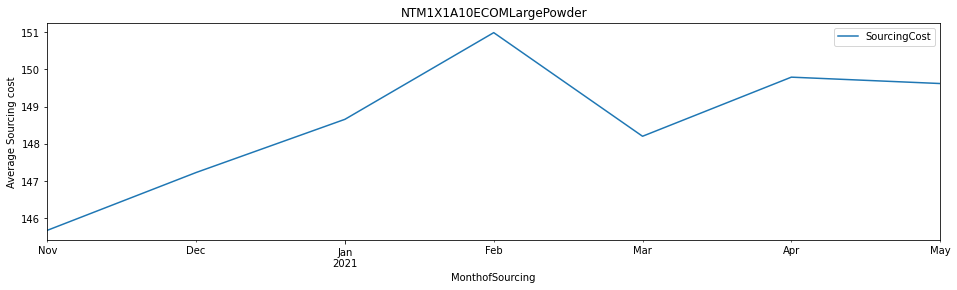

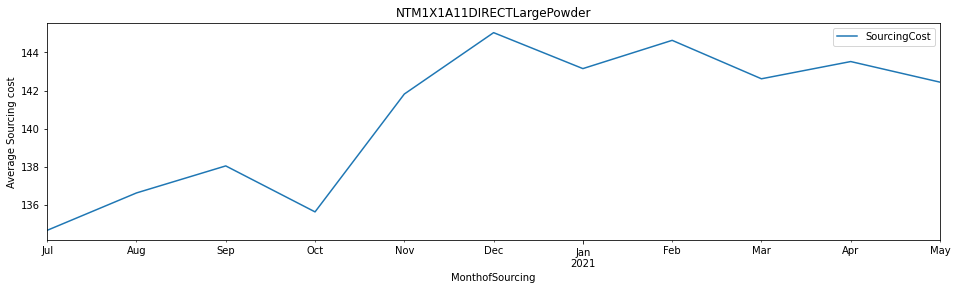

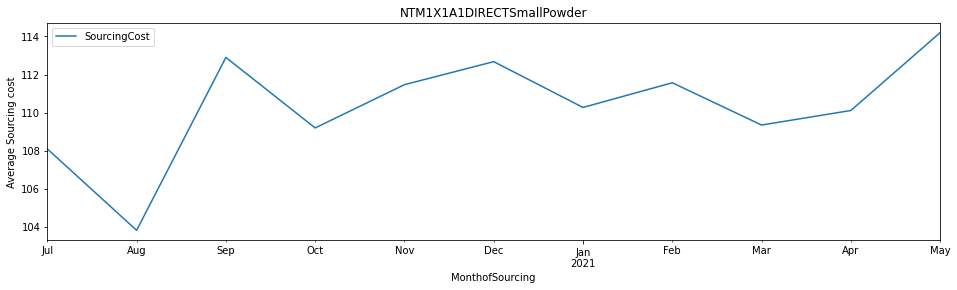

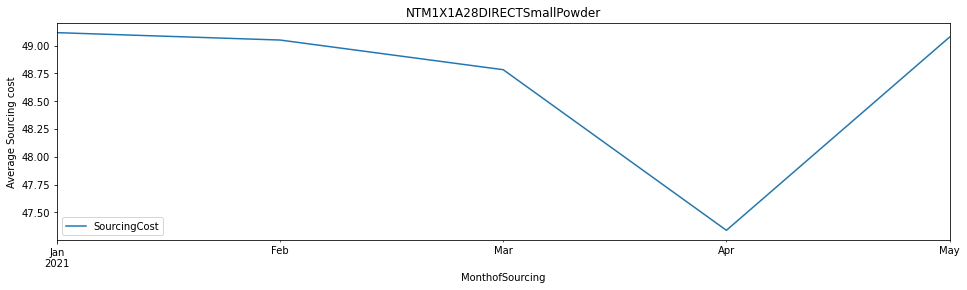

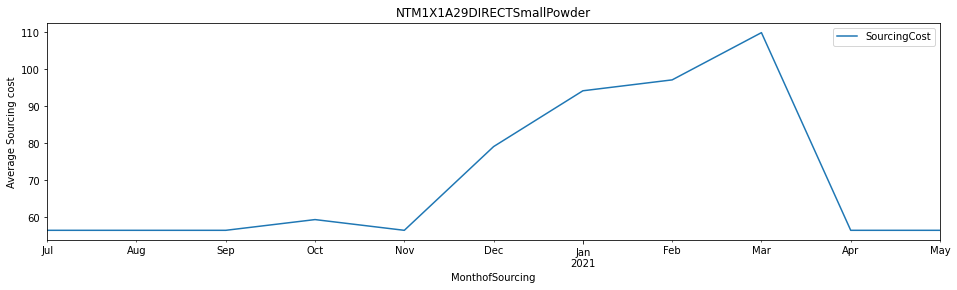

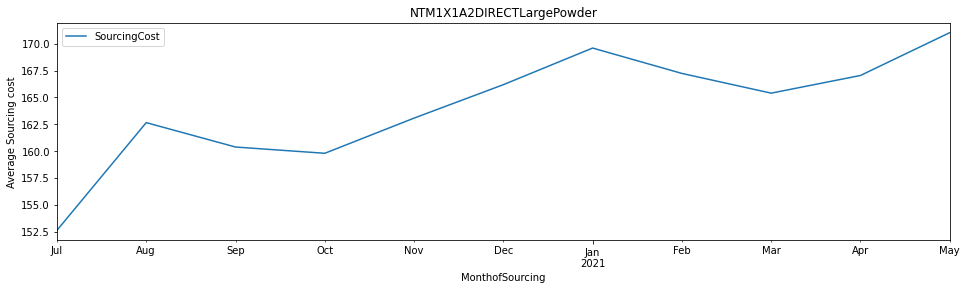

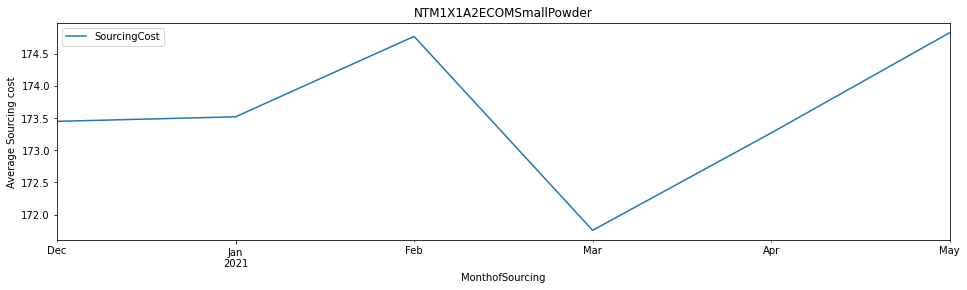

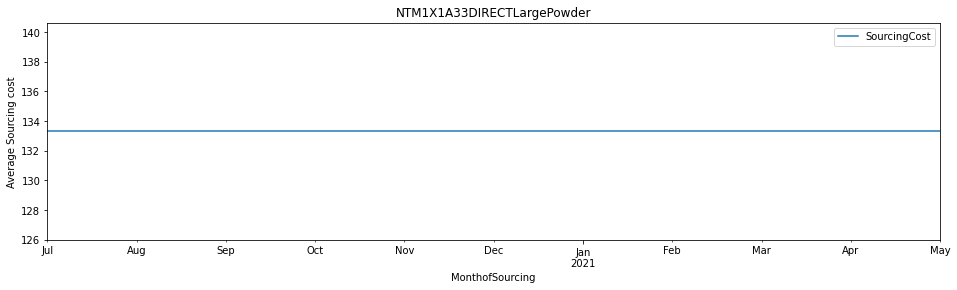

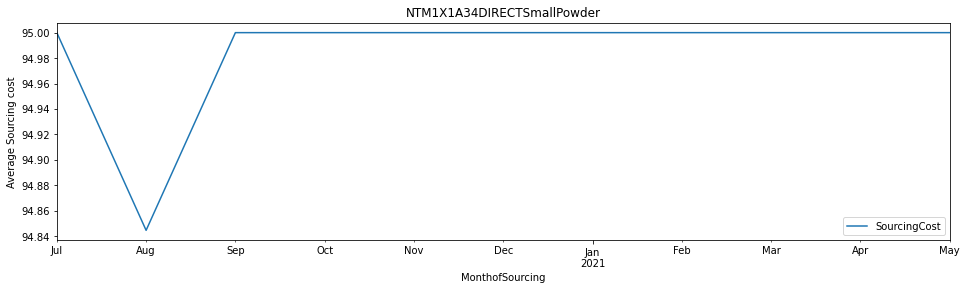

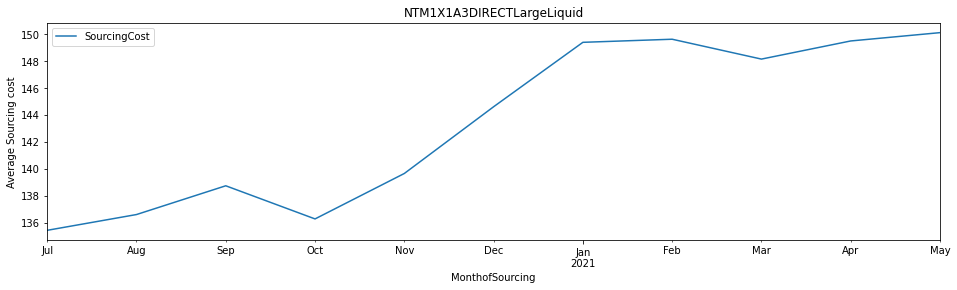

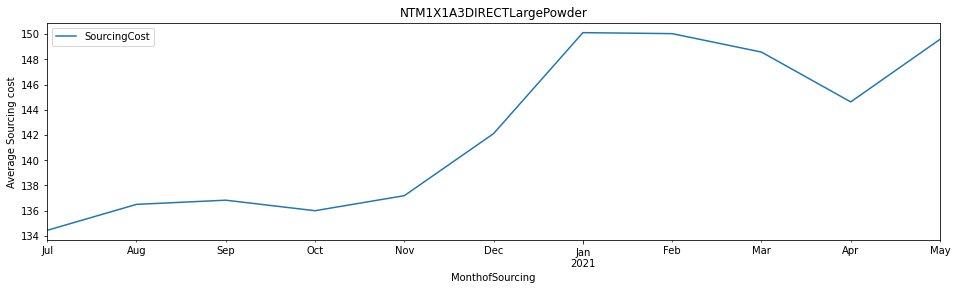

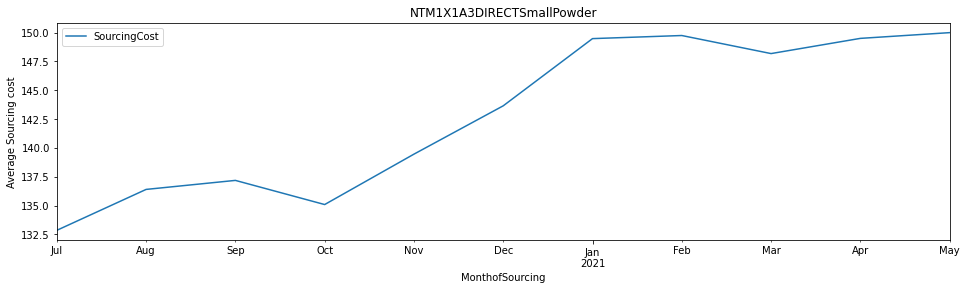

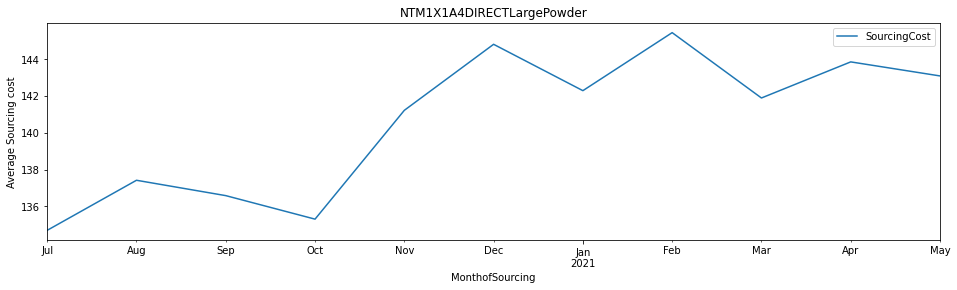

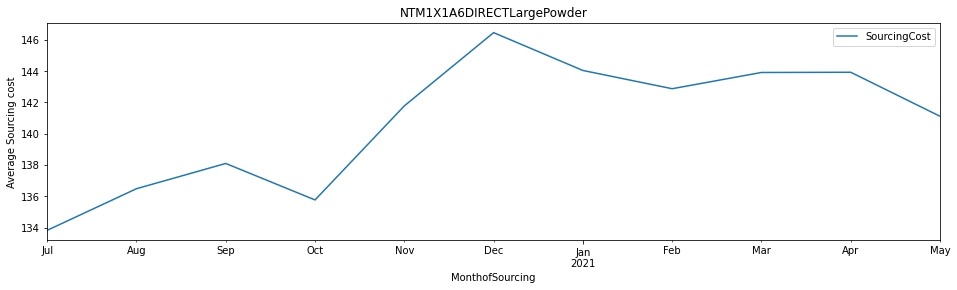

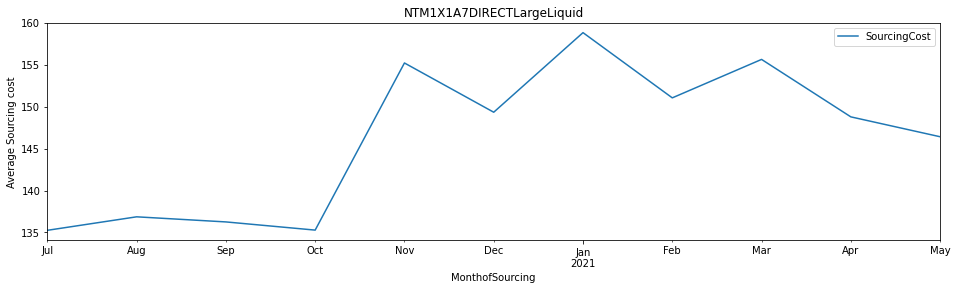

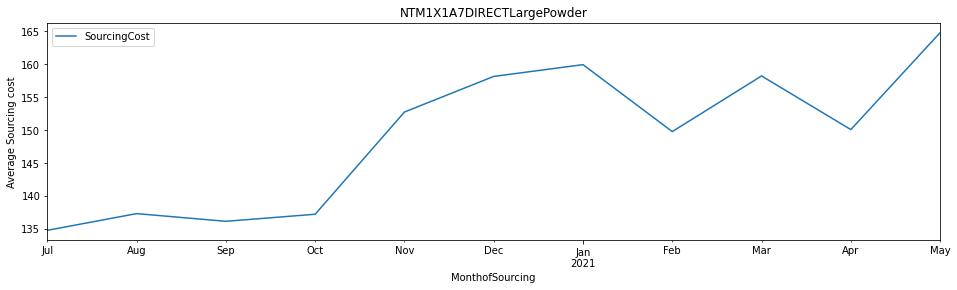

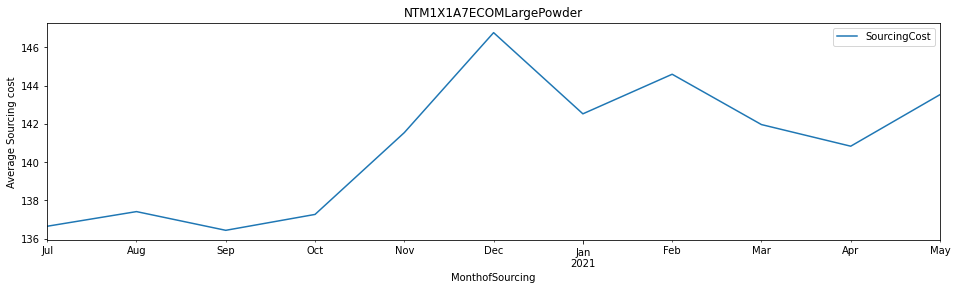

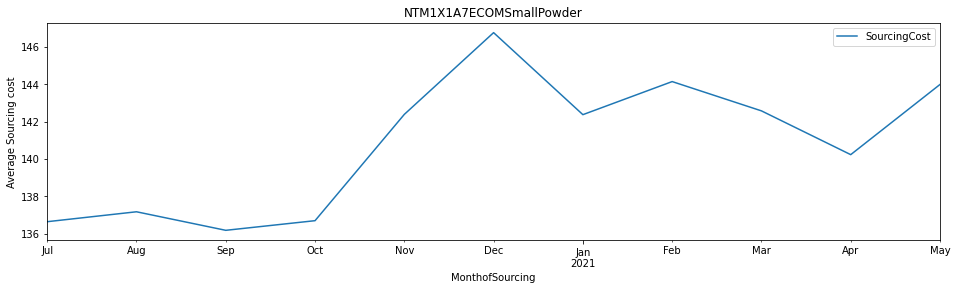

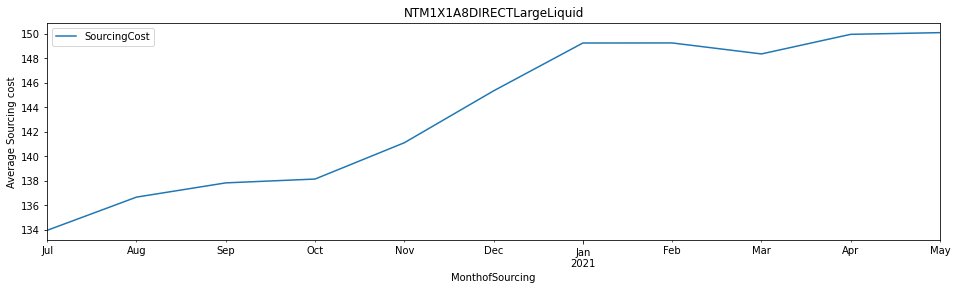

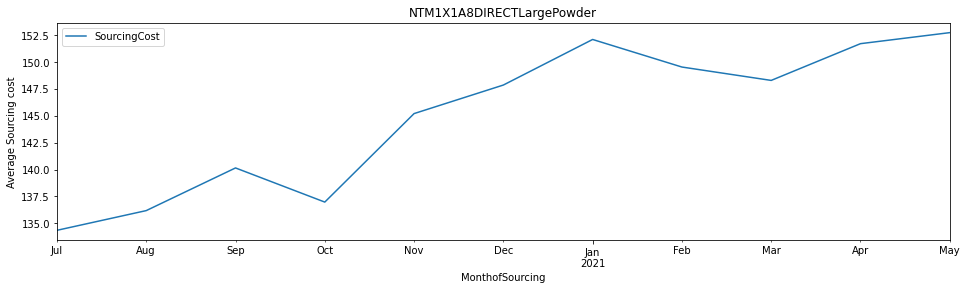

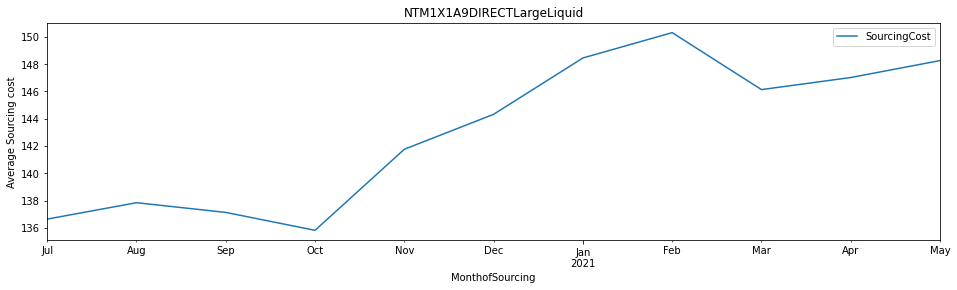

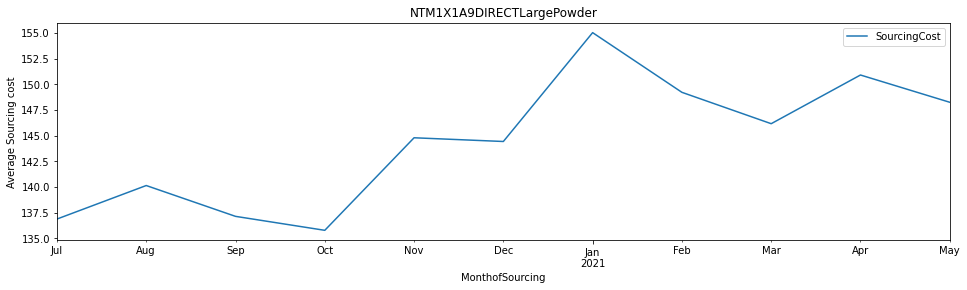

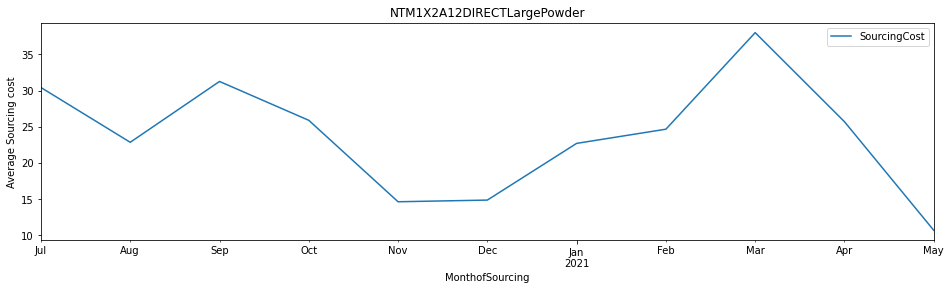

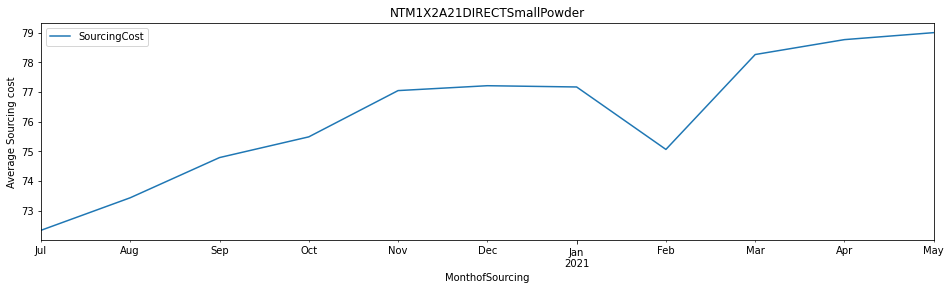

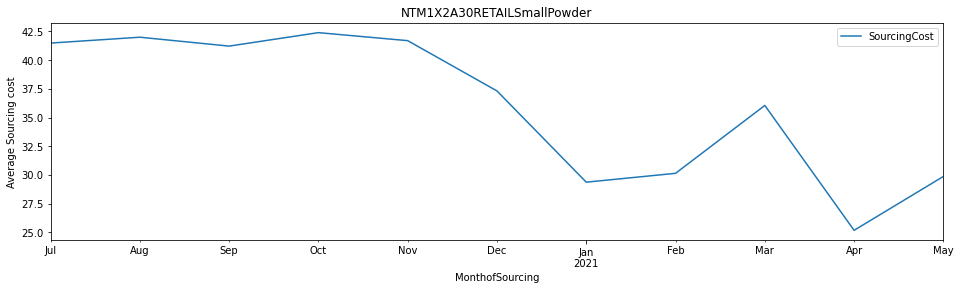

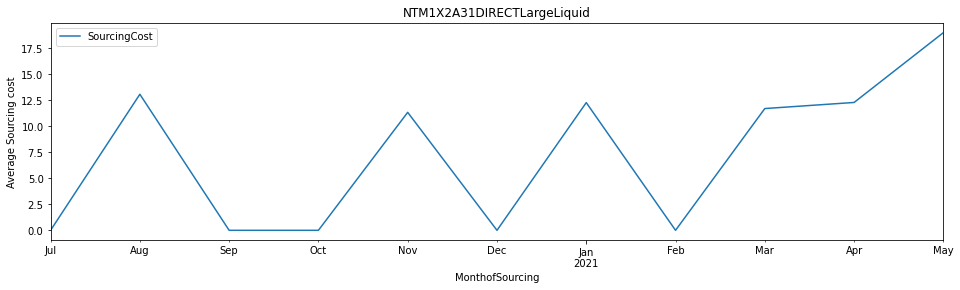

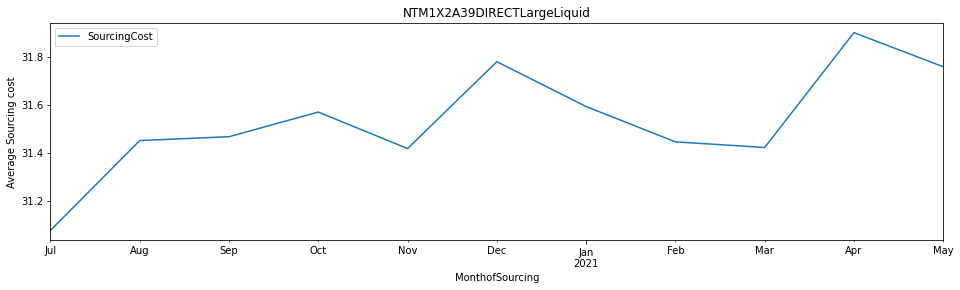

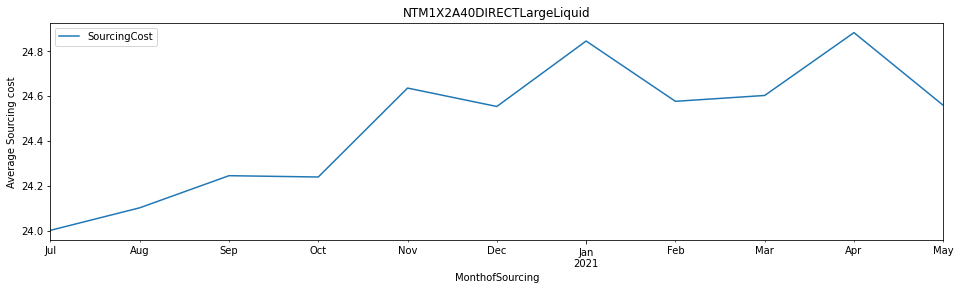

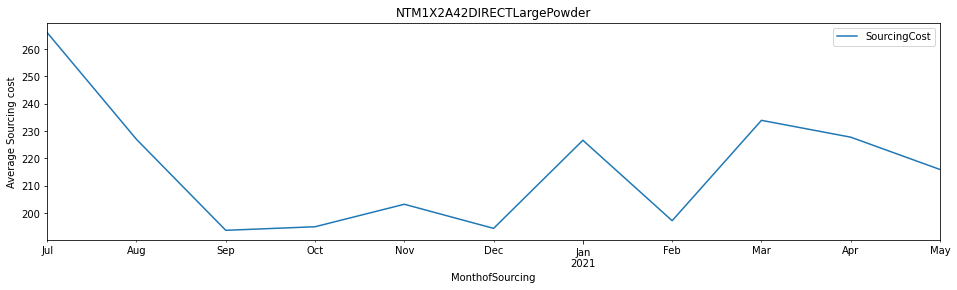

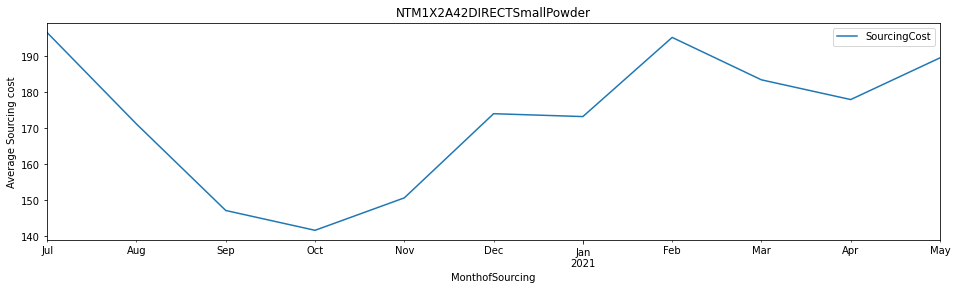

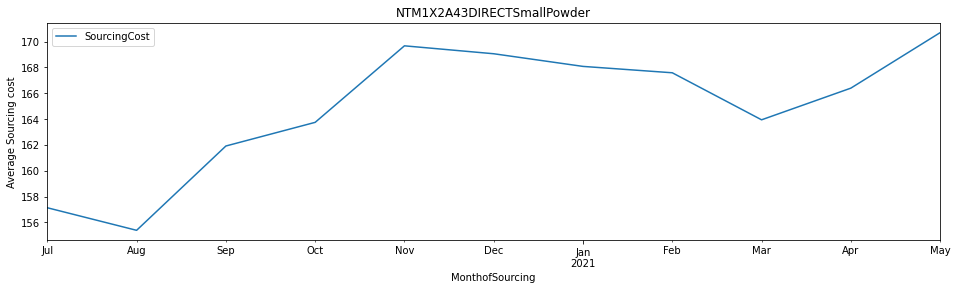

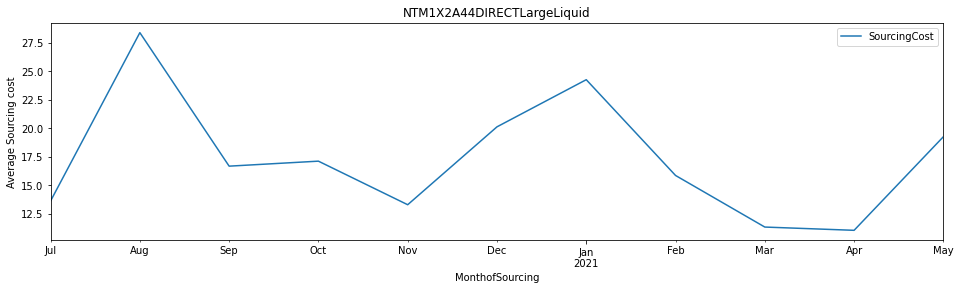

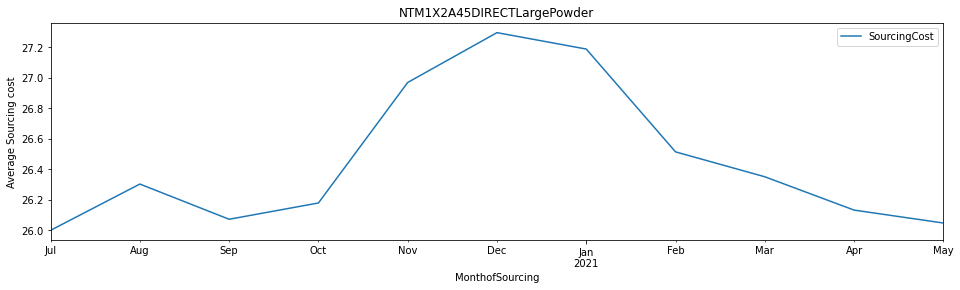

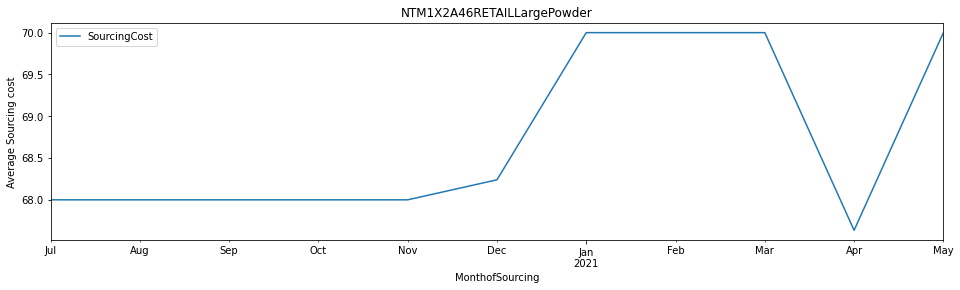

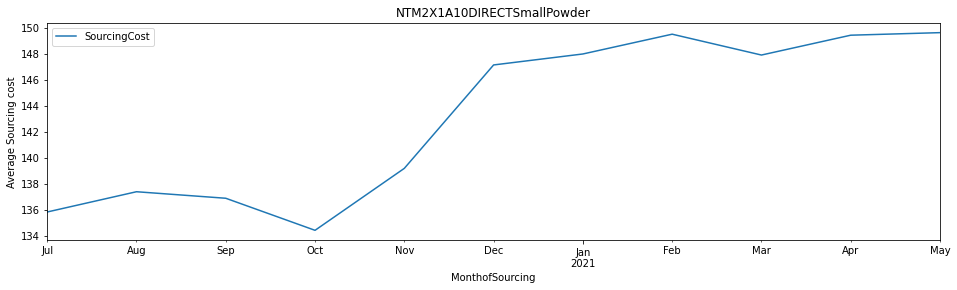

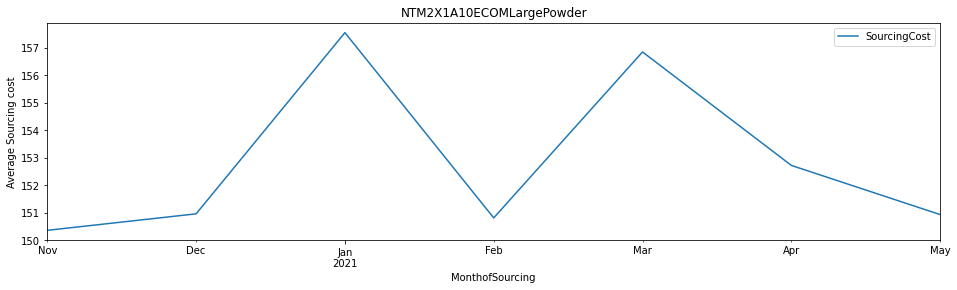

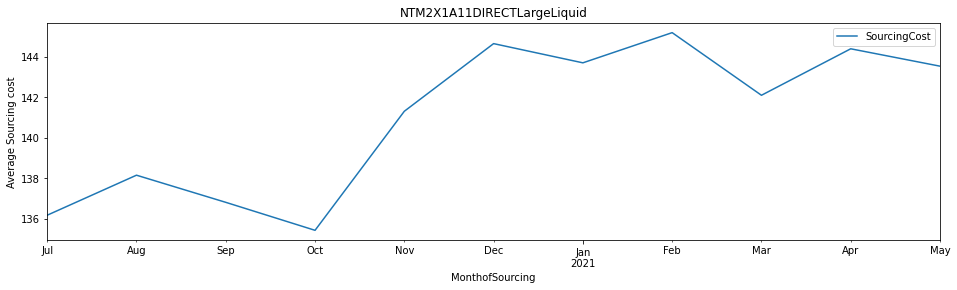

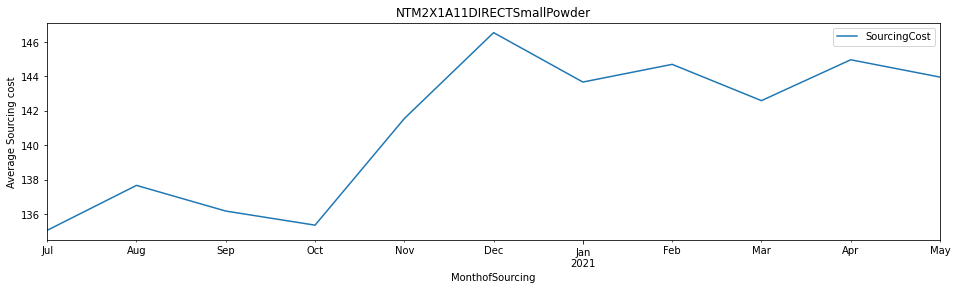

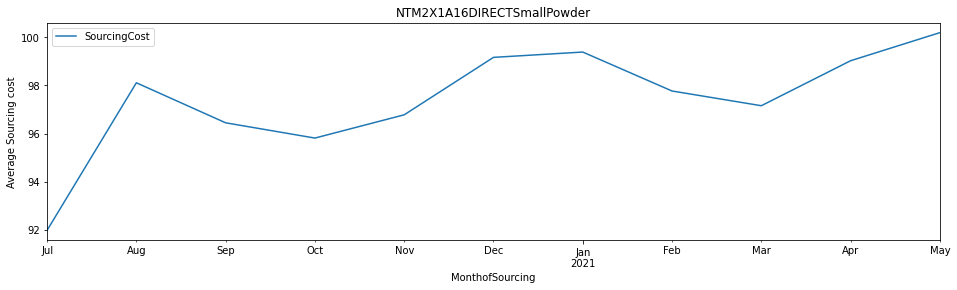

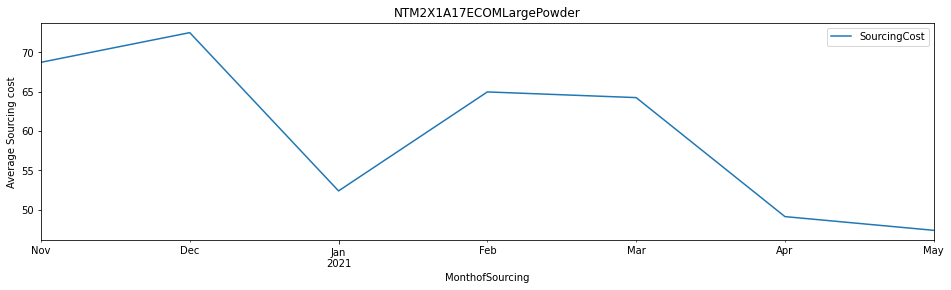

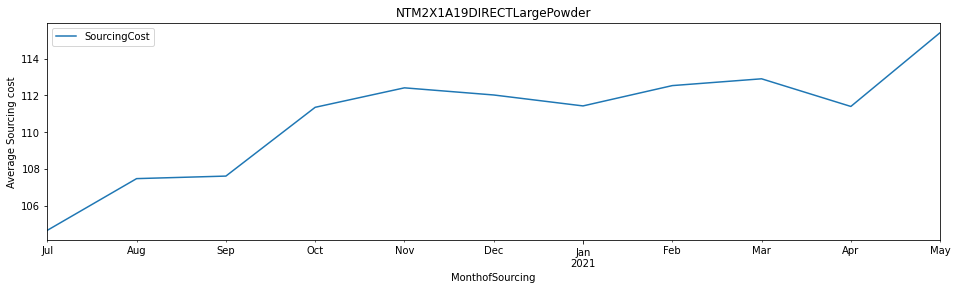

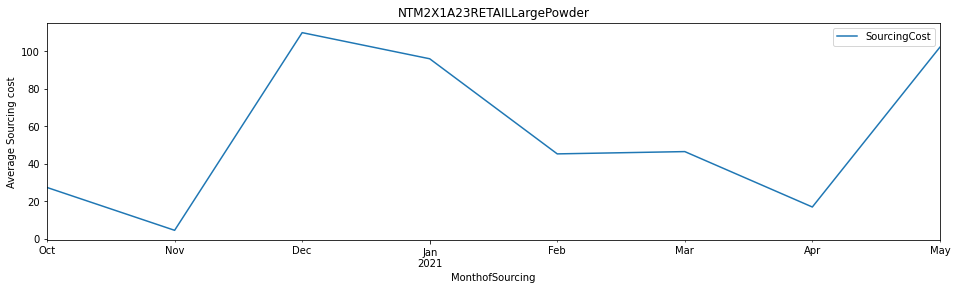

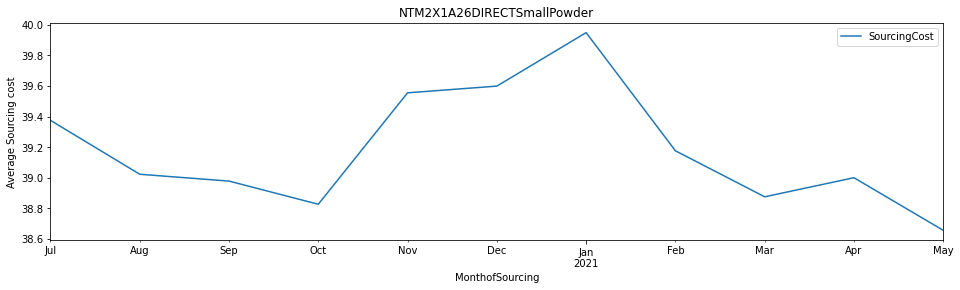

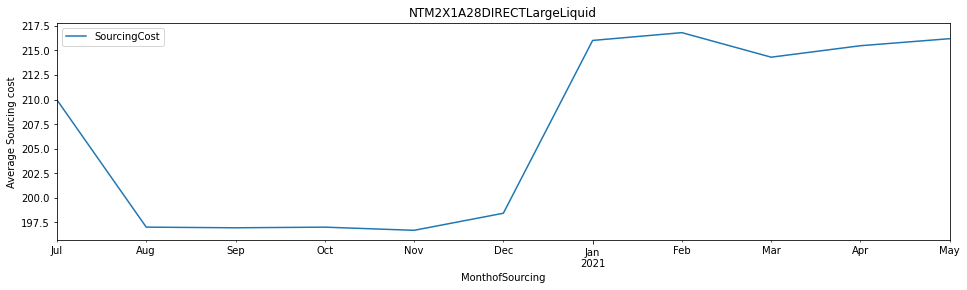

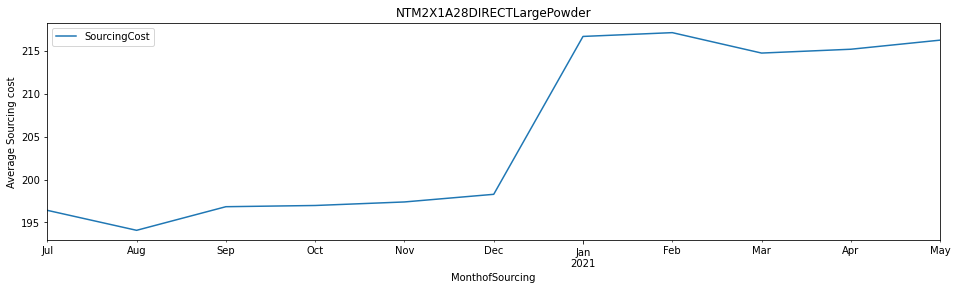

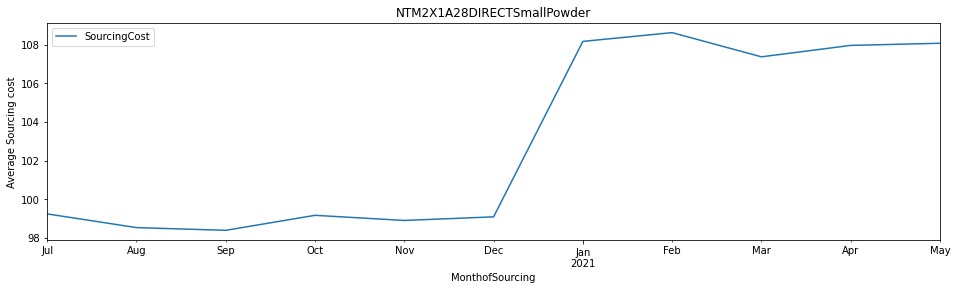

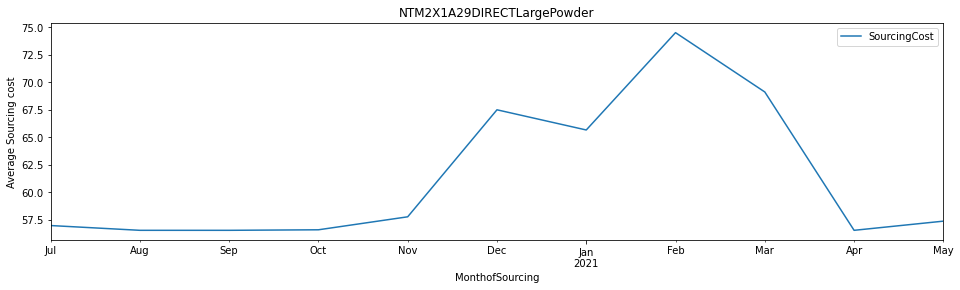

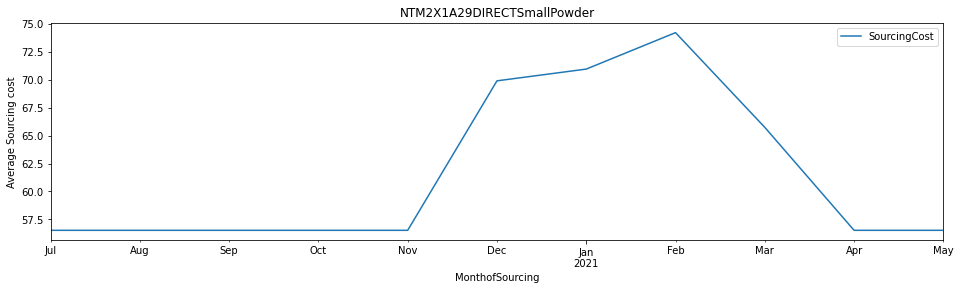

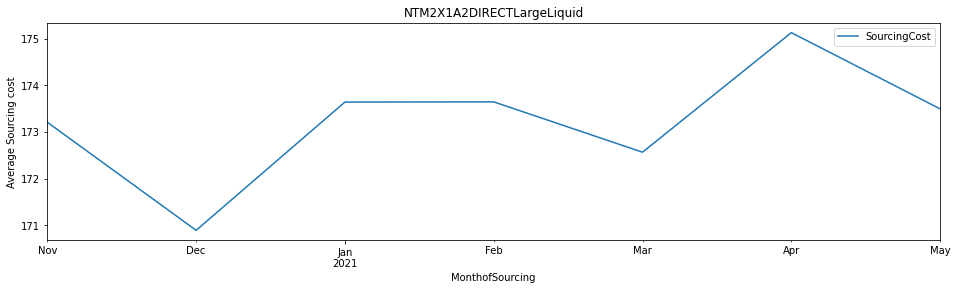

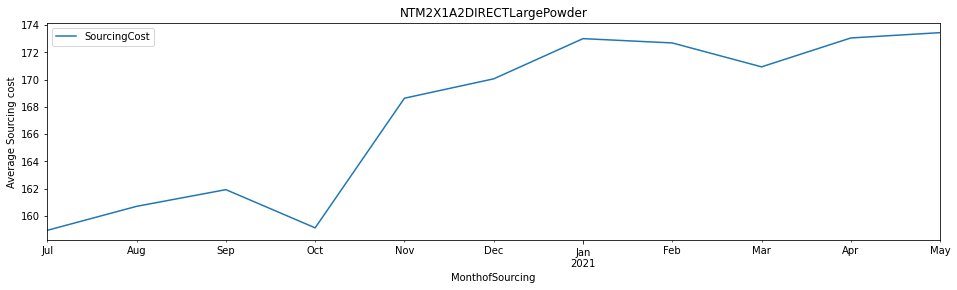

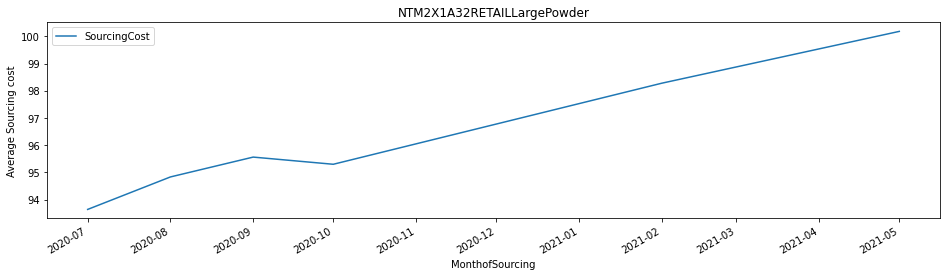

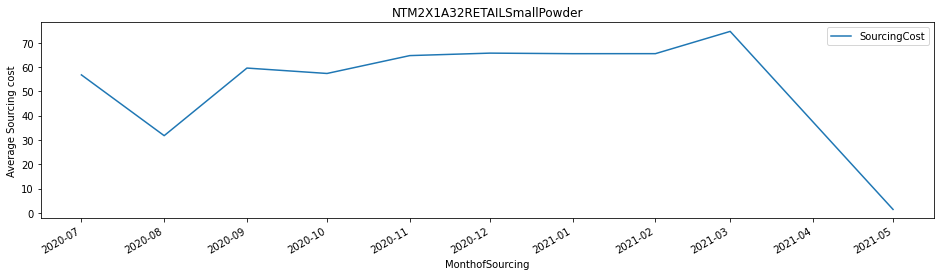

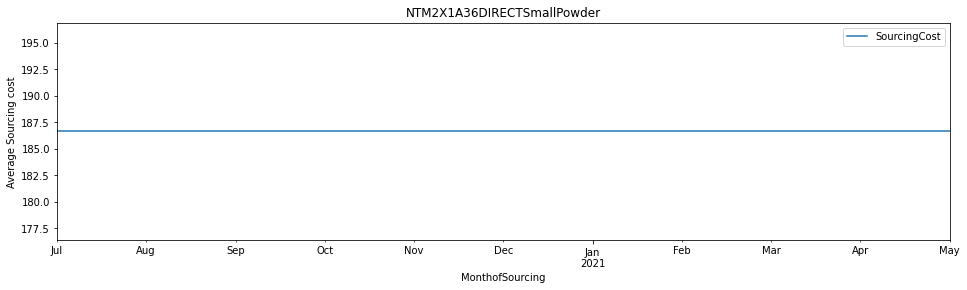

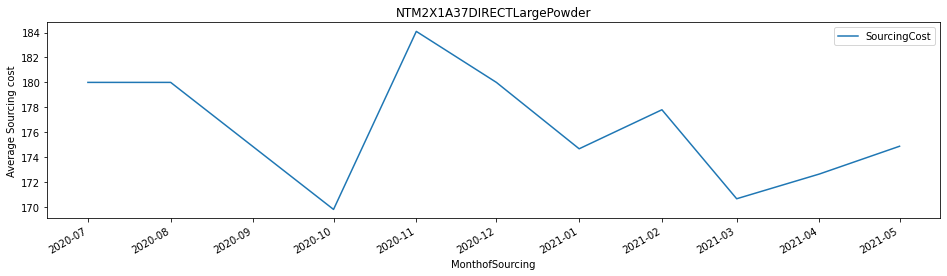

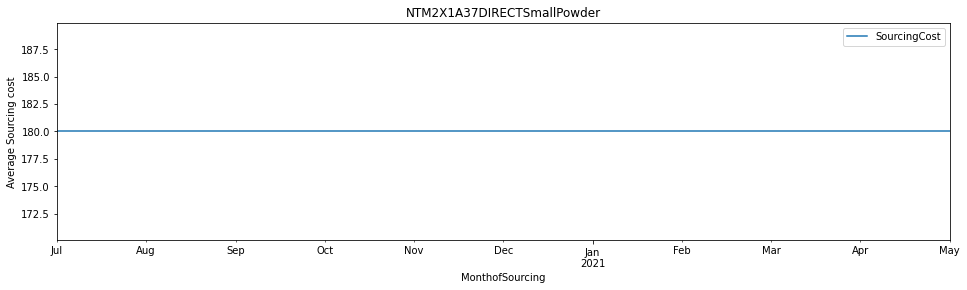

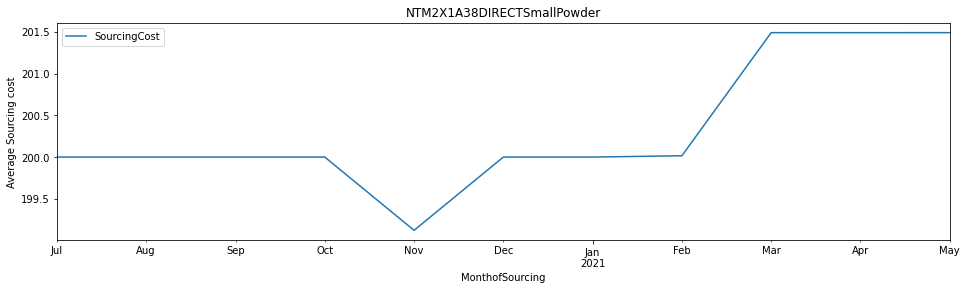

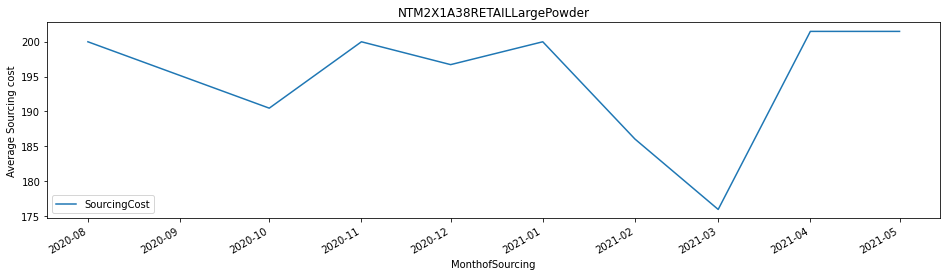

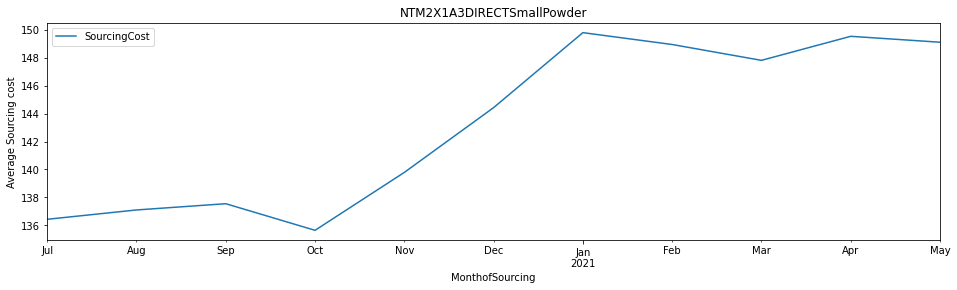

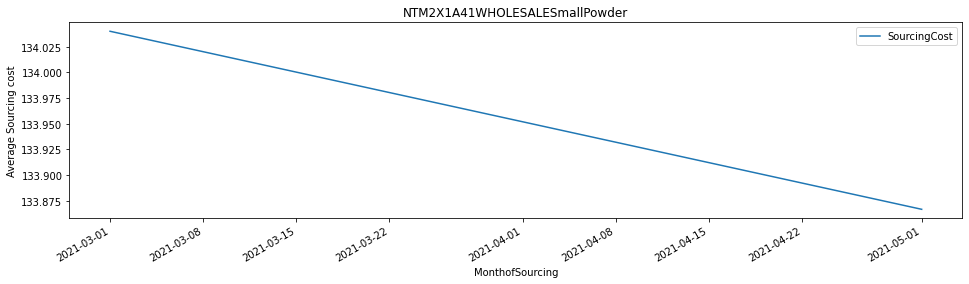

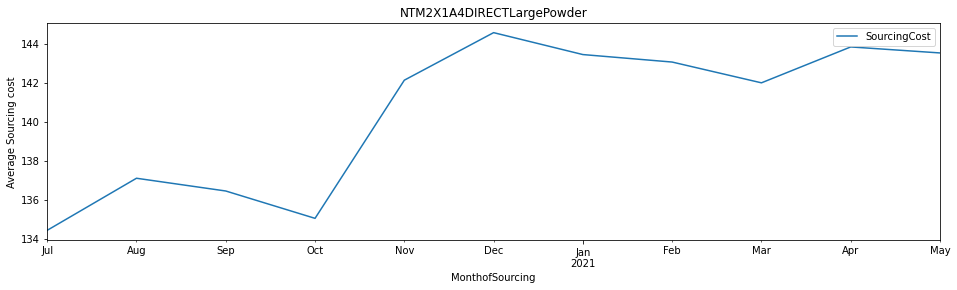

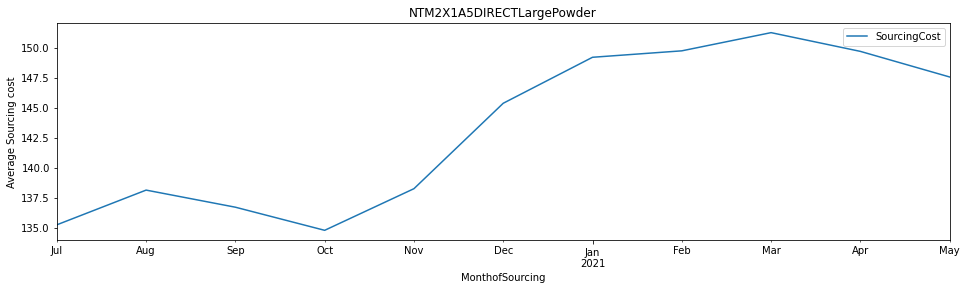

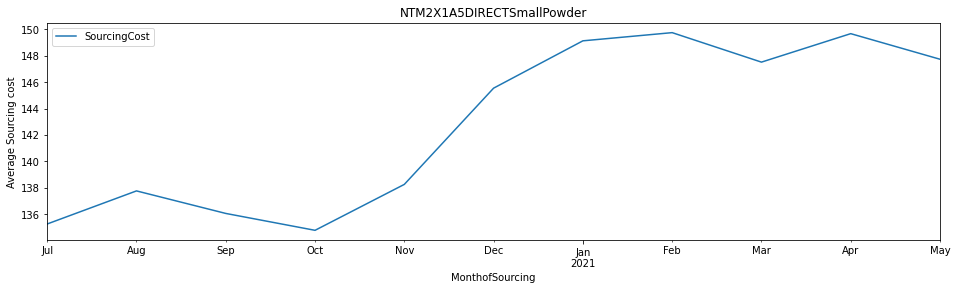

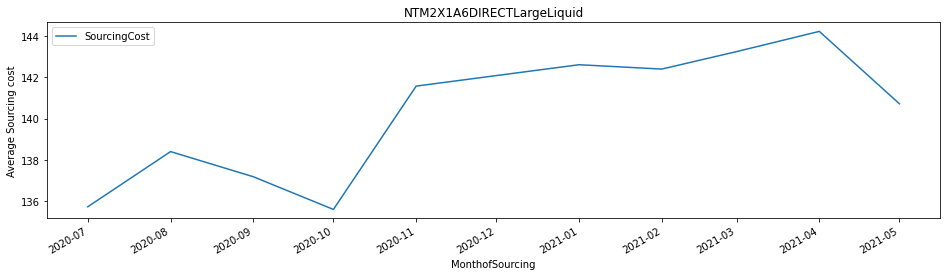

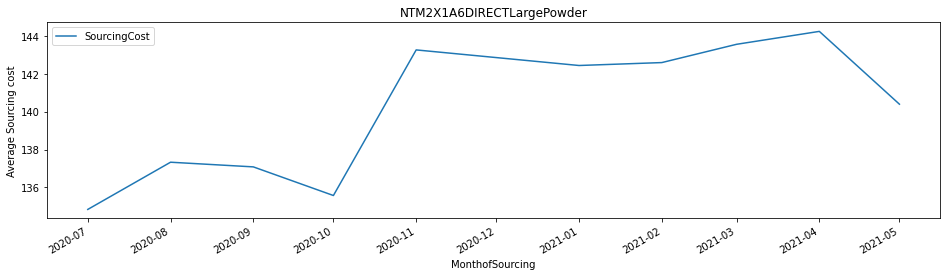

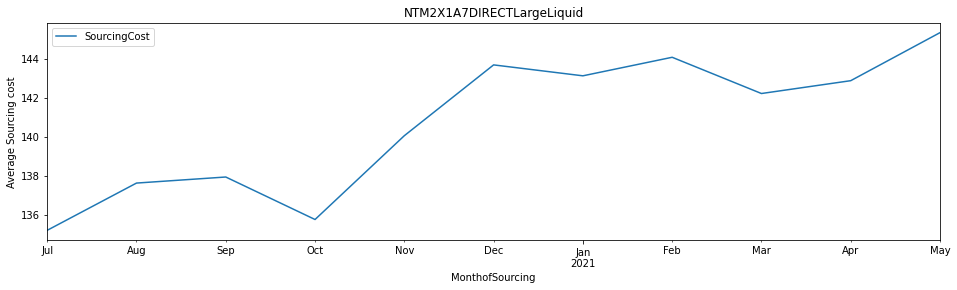

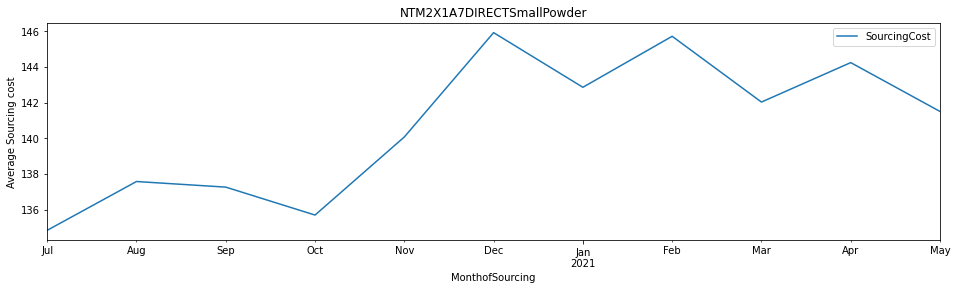

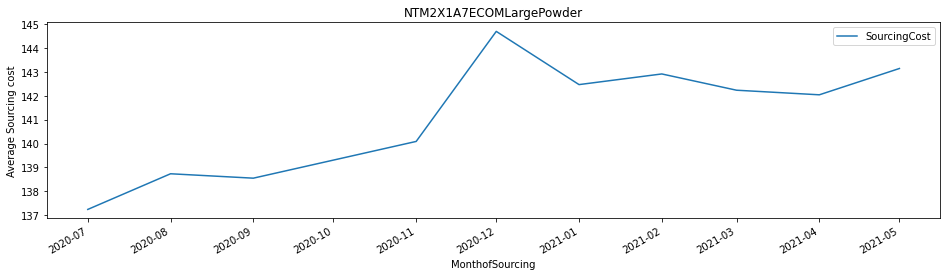

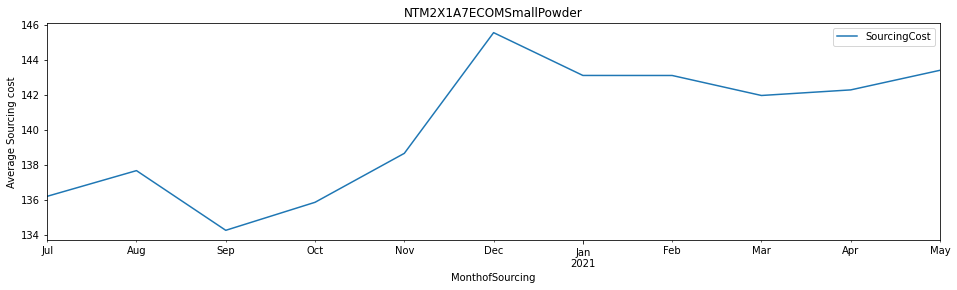

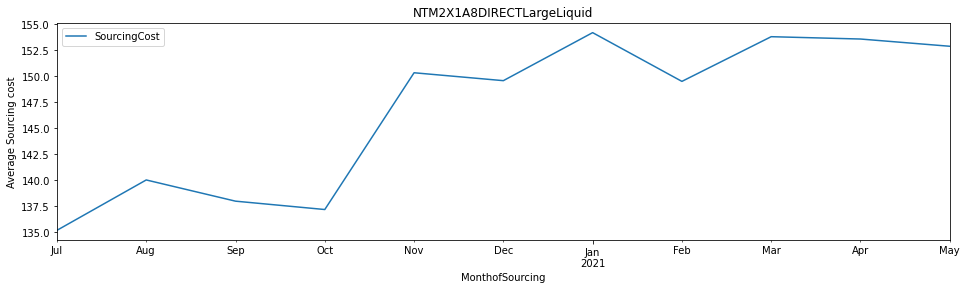

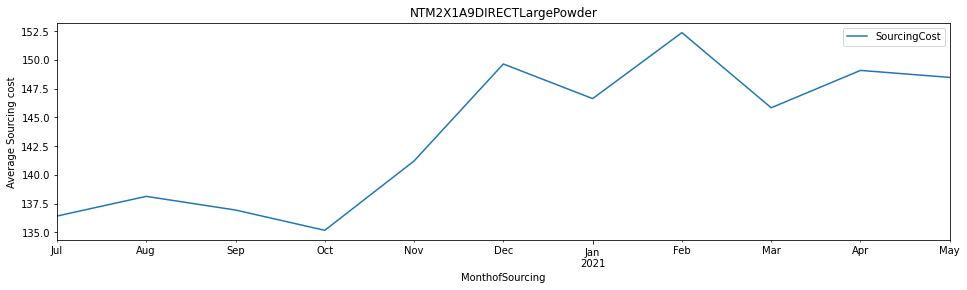

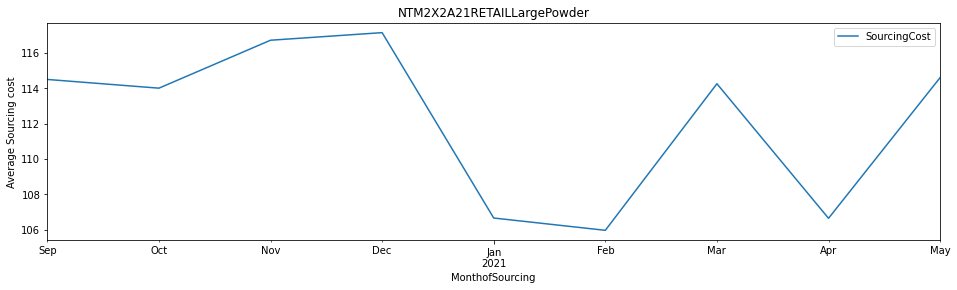

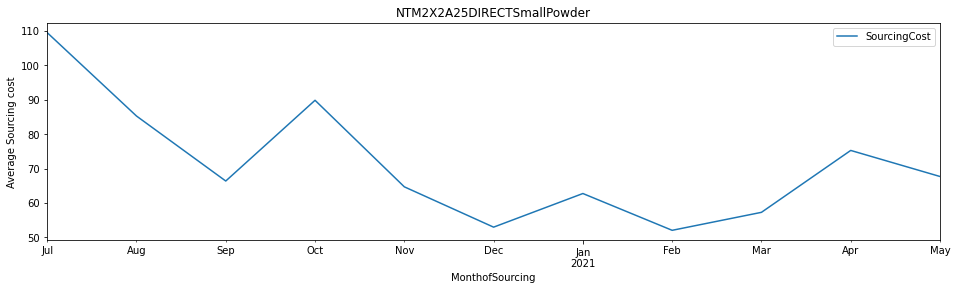

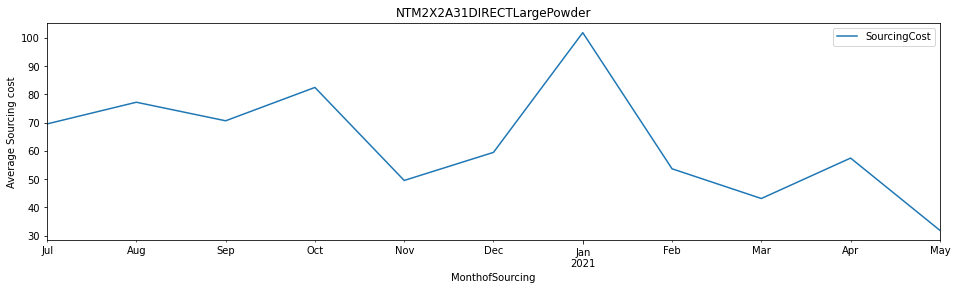

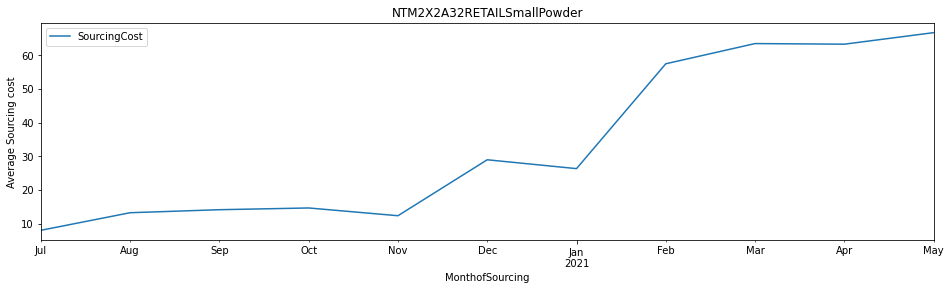

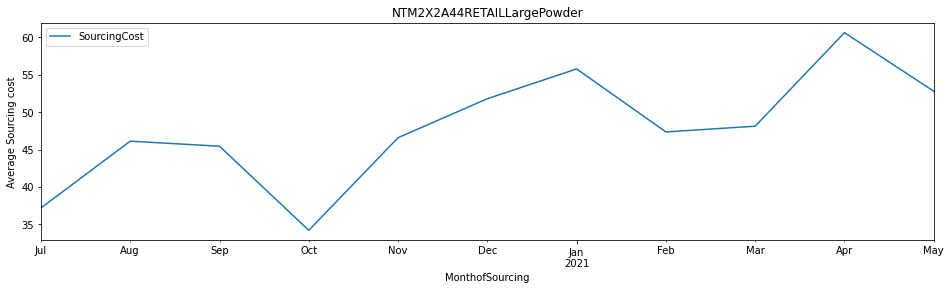

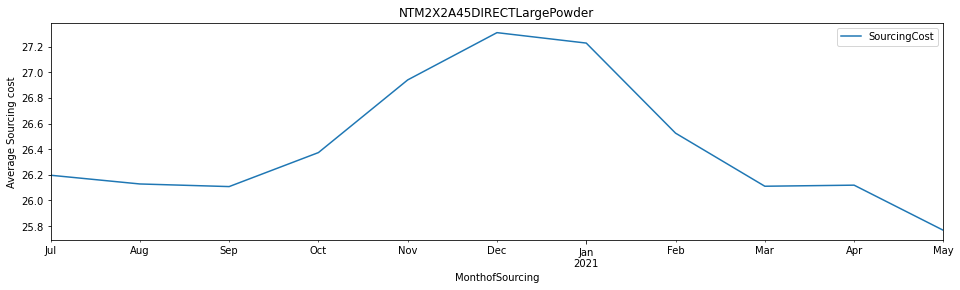

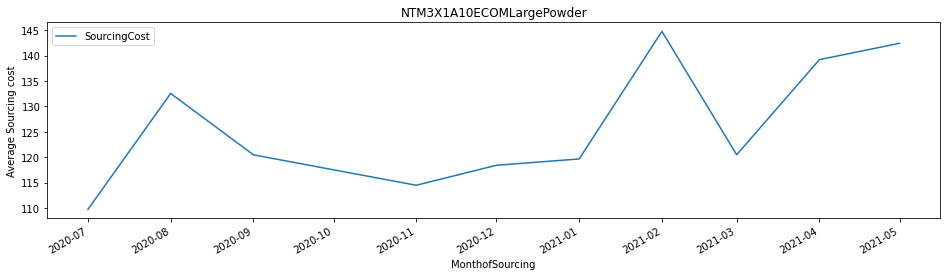

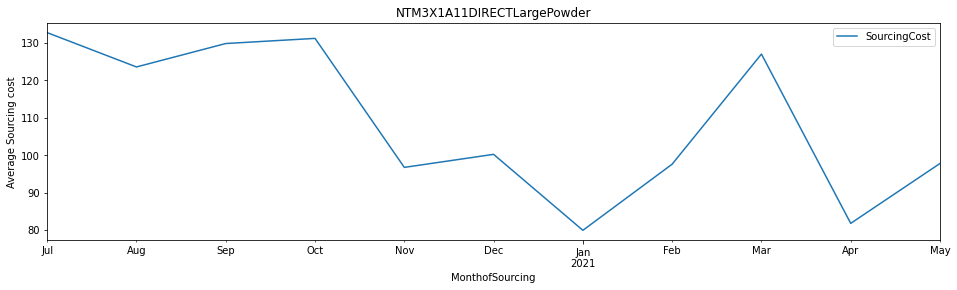

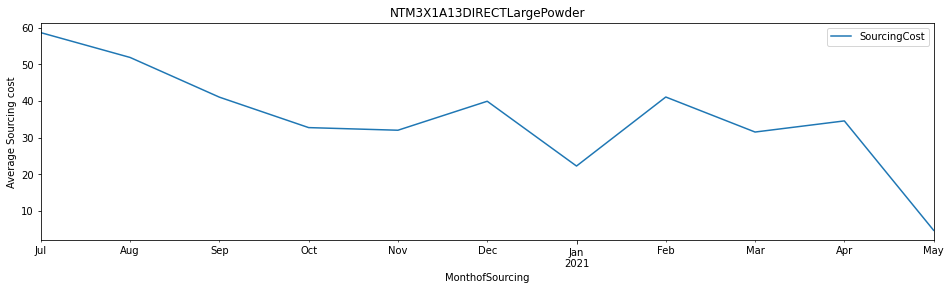

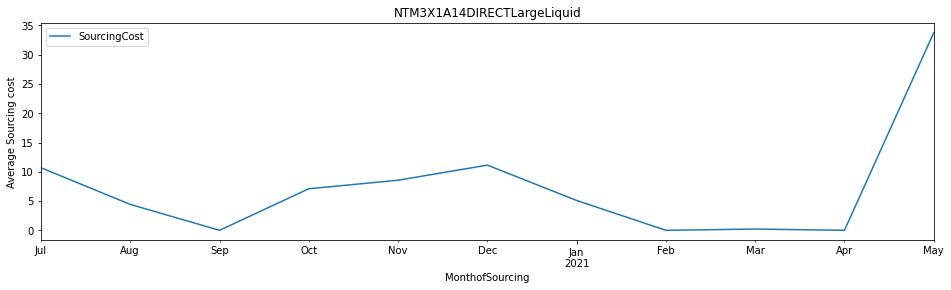

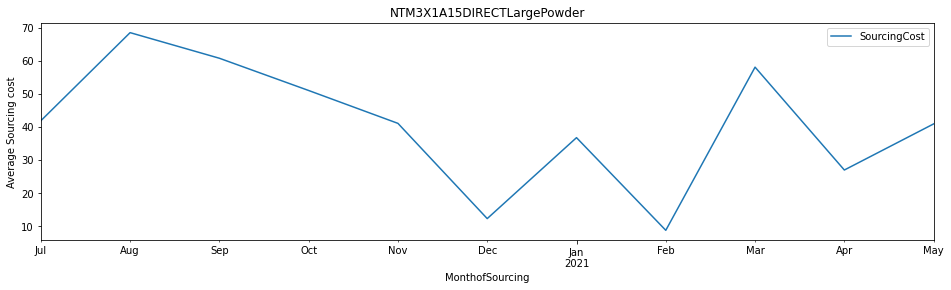

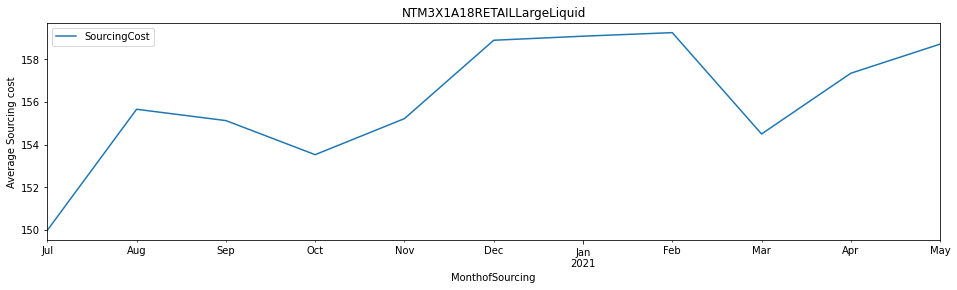

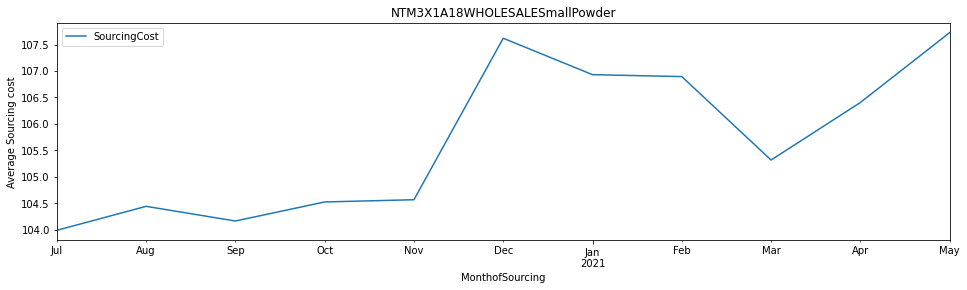

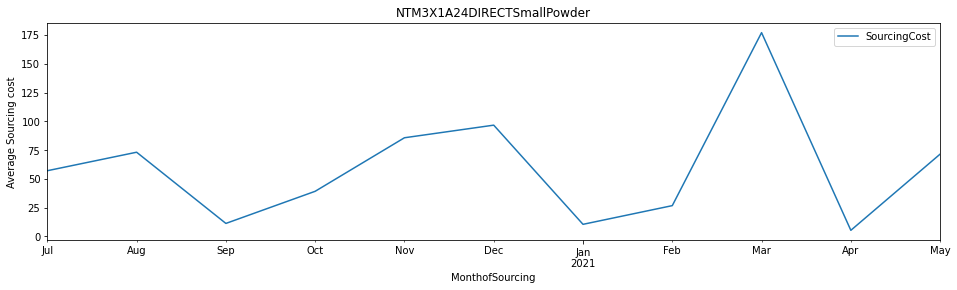

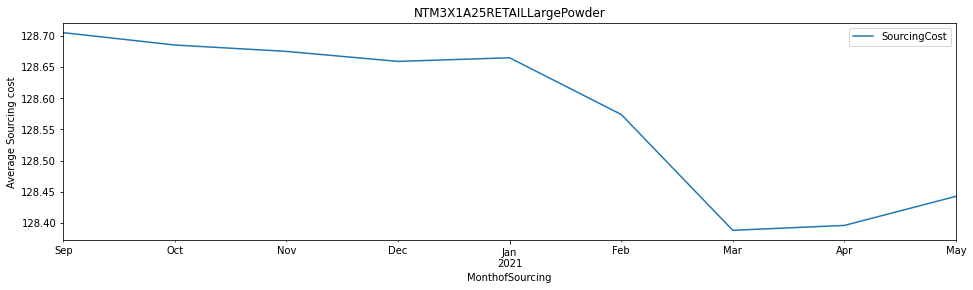

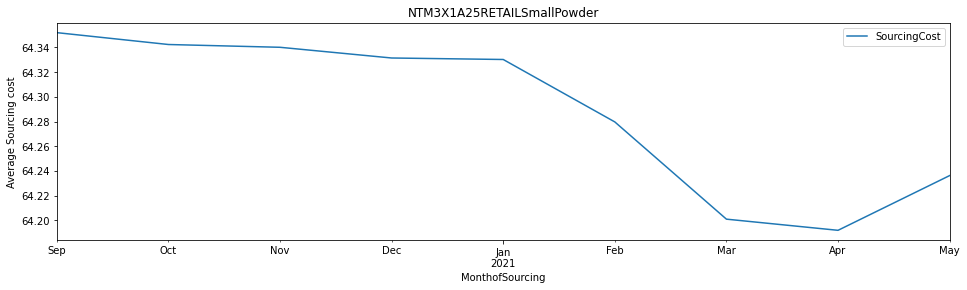

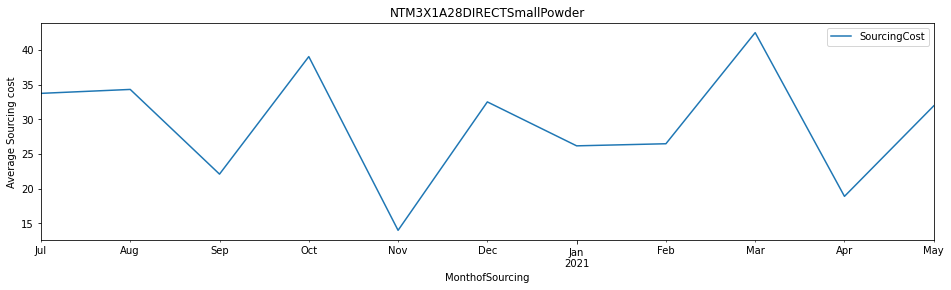

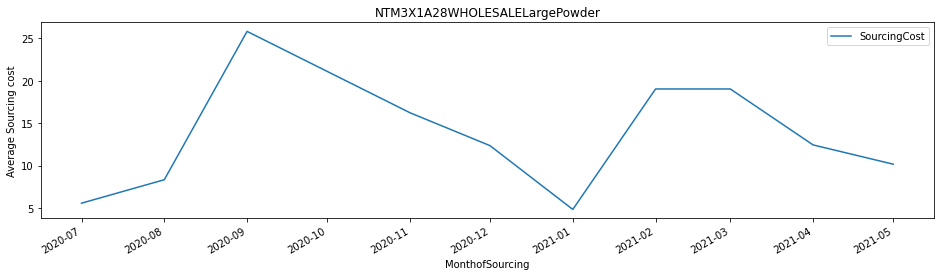

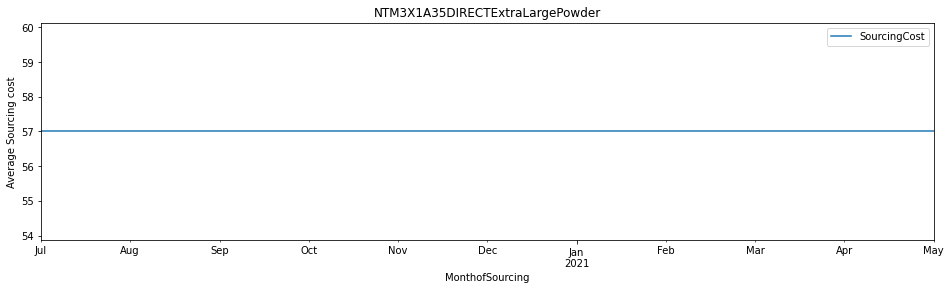

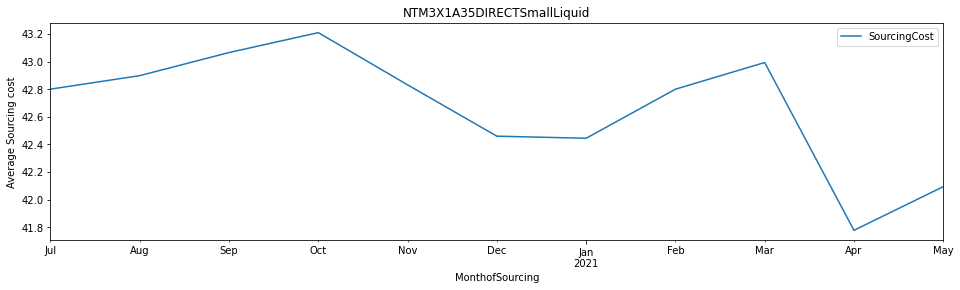

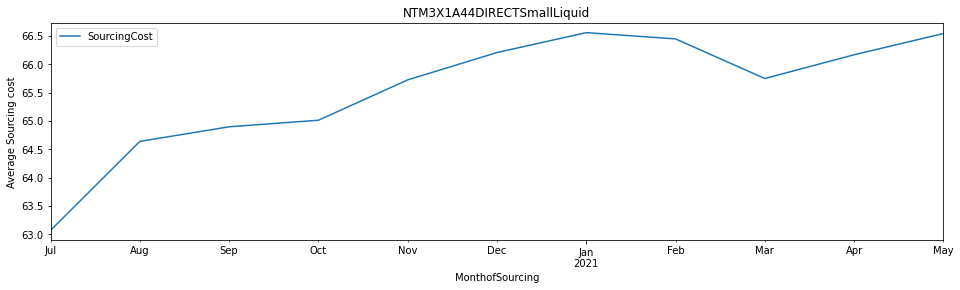

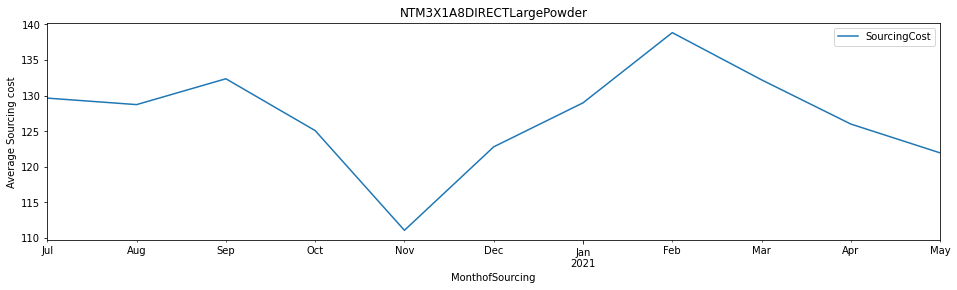

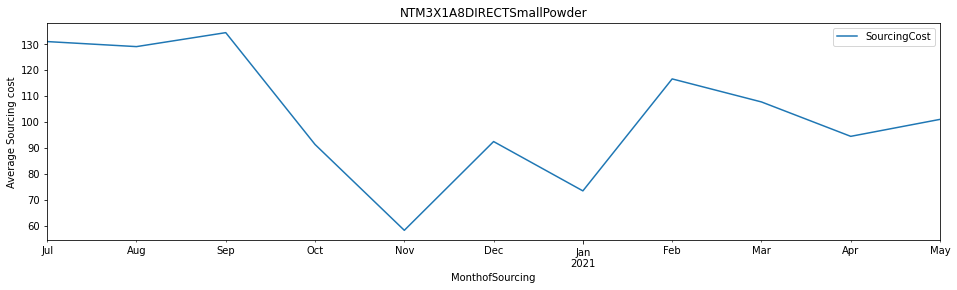

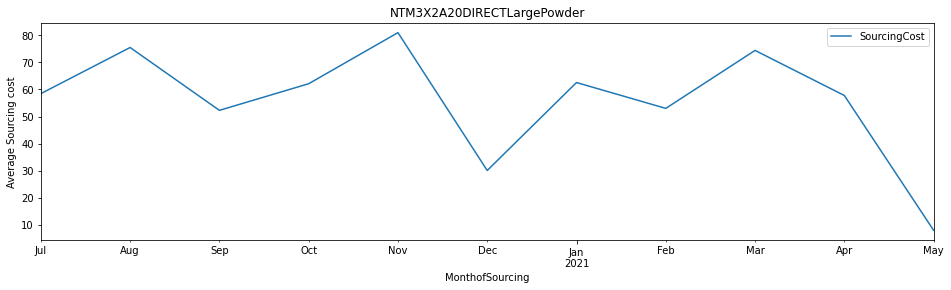

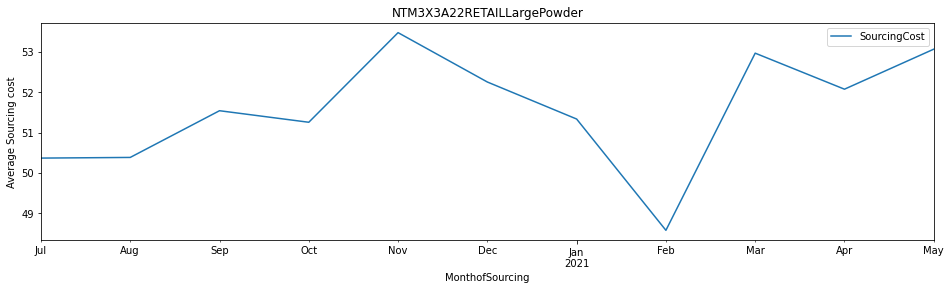

In [145]:
for group in groups:
    df = group[['SourcingCost','MonthofSourcing']].reset_index(drop=True)
    PID = group.ProductID.unique()[0]

    # Removing Outliers using Inter Quartile Range
    Q1 = np.percentile(df['SourcingCost'], 25, interpolation = 'midpoint') 
    Q3 = np.percentile(df['SourcingCost'], 75, interpolation = 'midpoint') 
    IQR = Q3 - Q1 
    old_shape = df.shape
    upper = np.where(df['SourcingCost'] > (Q3+1.5*IQR))
    lower = np.where(df['SourcingCost'] < (Q1-1.5*IQR))
    df.drop(upper[0], axis=0, inplace = True)
    df.drop(lower[0], axis=0, inplace = True)

    # Time Series Plot
    df.groupby('MonthofSourcing').mean().plot(figsize=(16,4), title=PID, ylabel='Average Sourcing cost');

## Conclusion

I trained 4 classes of models during Experiment:

**GROUPED TIME SERIES APPROACH** `DID NOT WORK`
1. RMSE of Bottom Up Approach: 376.75748084933656
2. Top Down Approach - Not used due to wrong assumption
3. Middle Out Approach - Not used due to lack of heirarchy

This approach performed best because it was based on the wrong assumption that we had to forecast monthly sum of Sourcing cost. After realising the wrong assumption, I tried to forecast monthly mean which gave this result. Also, the bottom up approach used for Grouped Time Series utilises autoarima to fit the models. After outlier removals, the data at bottom level(i.e. individual product level) became stationary and therefore ARIMA models were too complex for data and performed poorly.

**DEEP LEARNING** `NOTEBOOK NOT INCLUDED`

LSTM are used to model long range dependencies and hence are suitable for time series forecasting. I faced problems in using this approach due to categorical columns. I read about utilising categorical variables as an auxilary input. However, due to time constraints, wasn't able to do so.

**TREE BASED MODELS** `NOTEBOOK INCLUDED`
1. RMSE of DecisionTreeRegressor: 34.12919305031901
2. RMSE of RandomForestRegressor: 34.1144924600023
3. RMSE of ExtraTreesRegressor': 34.024829092084374
4. RMSE of AdaBoostRegressor: 38.25561832984171
5. RMSE of GradientBoostingRegressor: 33.99121520896884
6. RMSE of VotingRegressor : 31.334522814414328
7. RMSE of LGBMRegressor : 33.16664421051016
8. RMSE of XGBRegressor : 33.956663530227814

Tree Based models were chosen as they perform well will categorical variables. 
Outliers were removed using IQR and categorical variables were one-hot encoded.
For outliers removal, there were three choices. Not removing outliers gave the best results. Removing outliers at top product level(i.e. NTM1, NTM2) gave intermediate results and removing outliers at bottom unit level(i.e NTM1_A10_X1_DIRECT_Large_Powder) gave worst results.

I would have tuned the hyperparameters of the model but was unable to do so due to time constraints. This would increase the performance(i.e. decrease RMSE)


**SIMPLE TIME SERIES BASED MODELS** `NOTEBOOK INCLUDED`

Models Used
1. RMSE of Simple Moving Average: 37.291999530367285
2. RMSE of Exponential Weighted Average: 36.49481290429226
3. RMSE of Simple Exponential Smoothing: 37.283745121556244
4. RMSE of Additive Exponential Smoothing: 36.173433451689036
5. RMSE of Holt's Method: 36.173433451689036

Models Not Used due to Complexity or lack of Seasonality
1. ARIMA
2. SARIMAX
3. Holt Winter's method

Outliers were removed at the at bottom unit level(i.e NTM1_A10_X1_DIRECT_Large_Powder) using IQR. Then stationarity was tested using Augmented Dickey Fuller Test. After that these simple models were fitted. Trying to fit complex models such as ARIMA using autoarima in pmdarima library result in ARIMA(0,0,0) which means that the model is too complex as the data points were 11 months and even less for some.

**FINAL CHOICE**
Given all these models, Voting Regressor performed best. But, I would go for a simpler time series model such as Exponential Smoothing because it is easy to understand and diagnose any problems if it happens in future. Given more time, I would like to experiment using LSTMs for the data.

**NOTE**
1. IQR -> Inter Quartile Range
2. All notebooks have more detailed explanations inside them. Please look them through.
3. Code would have been better organised given more time.